In [75]:
#ספריות
import pandas as pd
import numpy as np
import seaborn as sns

In [76]:
#קריאת הדאטה
url = r"C:\Users\rotemb\Desktop\פרויקט למידת מכונת - חן חג'ג'\Public_Libraries.csv"
df = pd.read_csv(url)
df.head()

Fiscal Year          Library     County Principal Public?  AENGLC Rank  \
0         1996          Andover    Tolland                 P        109.0   
1         1996          Ansonia  New Haven                 P        158.0   
2         1996  Ashford-Babcock    Windham                 P        131.0   
3         1996             Avon   Hartford                 P         19.0   
4         1996     Beacon Falls  New Haven                 P        129.0   

   Population of Service Area  Total Library Visits  \
0                      2815.0               15000.0   
1                     17825.0               91756.0   
2                      3969.0                8665.0   
3                     14143.0              162893.0   
4                      5351.0                7000.0   

   Library Visits Per Capita Served  Total Registered Borrowers  \
0                               5.3                      1313.0   
1                               5.1                      6952.0   
2                               2.2                      1360.0   
3                              11.5                      8808.0   
4                               1.3                      1379.0   

   Percent of Residents with Library Cards  ...  Total Collection  \
0                                     0.47  ...           15285.0   
1                                     0.39  ...           63685.0   
2                                     0.34  ...           23818.0   
3                                     0.62  ...           74903.0   
4                                     0.26  ...           10042.0   

   Collection Per Capita Served  Total Operating Income  \
0                           5.4                 56300.0   
1                           3.6                320679.0   
2                           6.0                111699.0   
3                           5.3                685678.0   
4                           1.9                 40806.0   

   Operating Income Per Capita  Town Tax Appropriation for Library  \
0                        20.00                             52915.0   
1                        17.99                            323503.0   
2                        28.14                            106713.0   
3                        48.48                            602831.0   
4                         7.63                             39256.0   

   Tax Appropriation Per Capita Served  Library Materials Expenditures  \
0                                18.80                         10073.0   
1                                18.15                         45874.0   
2                                26.89                         11508.0   
3                                42.62                         92711.0   
4                                 7.34                          4298.0   

   Wages & Salaries Expenditures  Operating Expenditures  \
0                        30996.0                 44290.0   
1                       201621.0                270658.0   
2                        62295.0                 82769.0   
3                       340400.0                516583.0   
4                        21585.0                 39165.0   

   Operating Expenditures Per Capita  
0                               15.7  
1                               15.2  
2                               20.9  
3                               36.5  
4                                7.3  

[5 rows x 29 columns]

In [77]:
df.shape

(5105, 29)

In [78]:
df.isnull().sum()

Fiscal Year                                              0
Library                                                  0
County                                                   0
Principal Public?                                        0
AENGLC Rank                                            117
Population of Service Area                             463
Total Library Visits                                   219
Library Visits Per Capita Served                       235
Total Registered Borrowers                             105
Percent of Residents with Library Cards                119
Registrations Per Capita Served                       5105
Reference Questions                                    396
Reference Questions Per Capita Served                  425
Total Circulation                                       53
Circulation Per Capita Served                           70
Total Programs (Synchronous + Prerecorded)             168
Total Program Attendance & Views                       1

In [79]:
df['Library'].value_counts()

Andover                         28
Ridgefield                      28
Plainville                      28
Plymouth - Terryville           28
Pomfret                         28
                                ..
Plainfield - Central Village     1
Litchfield - Gilbert             1
Pomfret - Abington               1
East Windsor - Broad             1
Derby-Derby Neck                 1
Name: Library, Length: 208, dtype: int64

### נסנן את כל הספריות שיש להן פחות מ28 רשומות 

In [80]:
# סינון ספריות עם פחות מ-20 רשומות
df = df.groupby('Library').filter(lambda x: len(x) >= 28)

In [81]:
df.isnull().sum()

Fiscal Year                                              0
Library                                                  0
County                                                   0
Principal Public?                                        0
AENGLC Rank                                             20
Population of Service Area                              89
Total Library Visits                                   159
Library Visits Per Capita Served                       161
Total Registered Borrowers                              50
Percent of Residents with Library Cards                 50
Registrations Per Capita Served                       4592
Reference Questions                                    287
Reference Questions Per Capita Served                  295
Total Circulation                                       15
Circulation Per Capita Served                           17
Total Programs (Synchronous + Prerecorded)              80
Total Program Attendance & Views                       1

### נסיר עמודות שיש להן אחוז חסרים מאוד גבוה

In [82]:
df = df.drop(columns=['Registrations Per Capita Served','Reference Questions Per Capita Served','Reference Questions','Use of Public Internet Computers'])

### נבחן את עמודת הביקורים בספריה

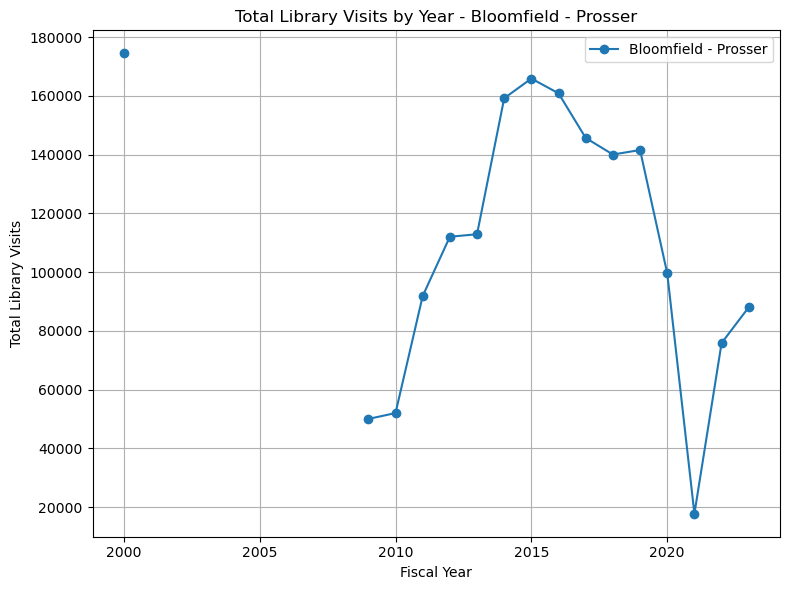

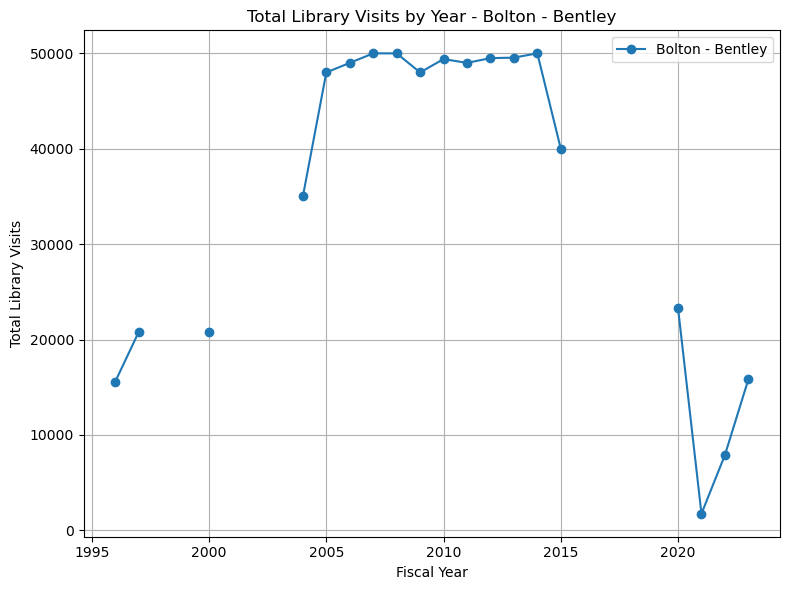

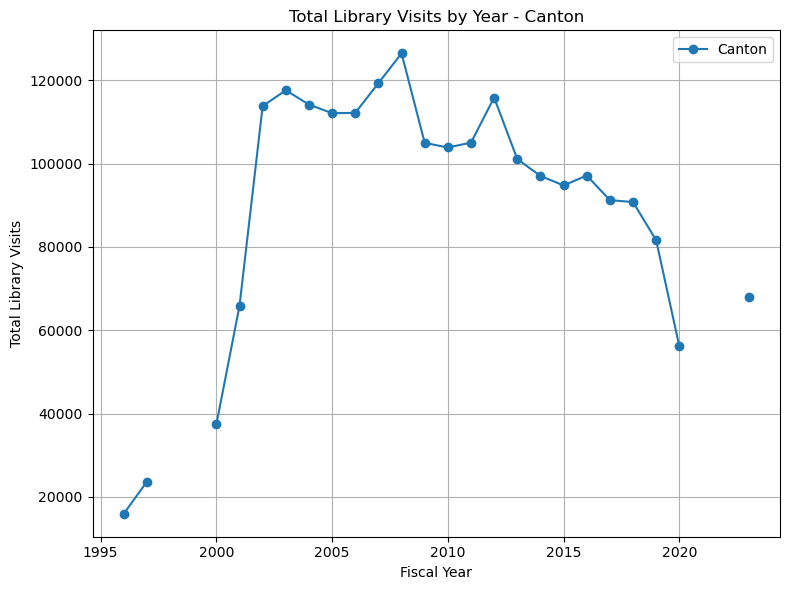

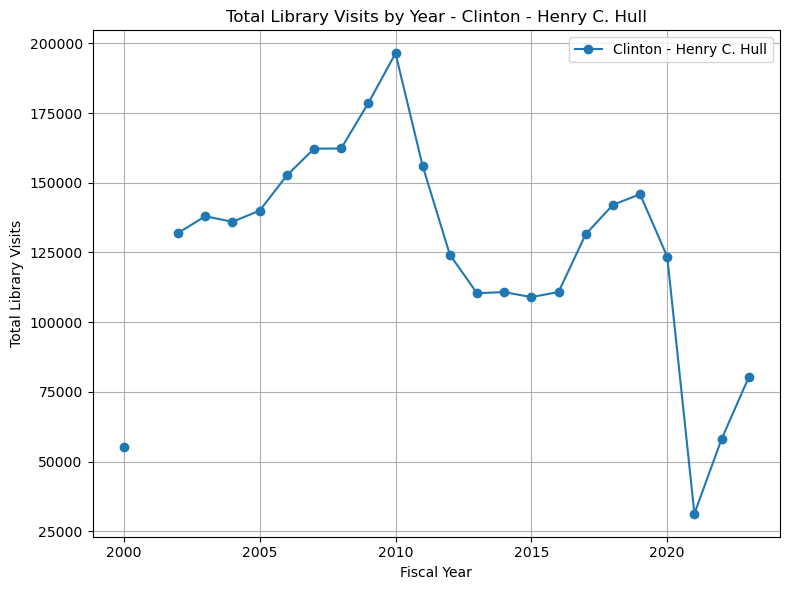

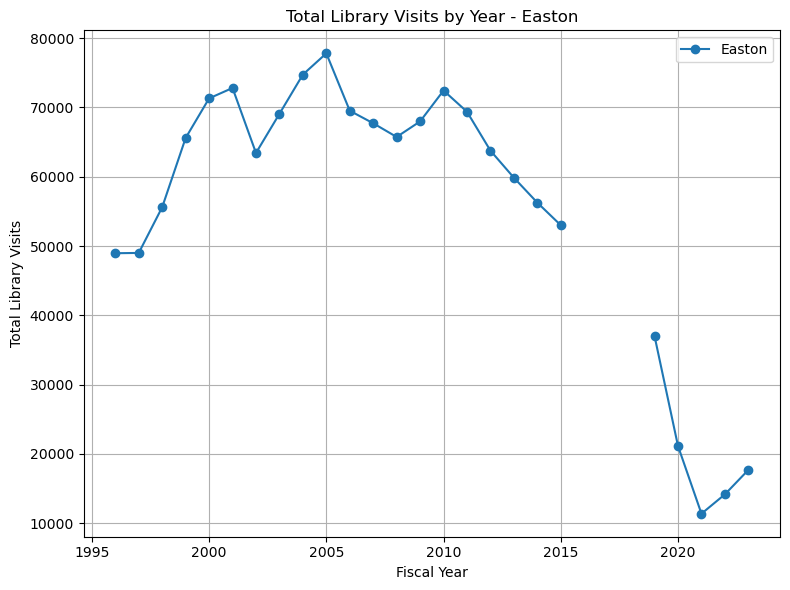

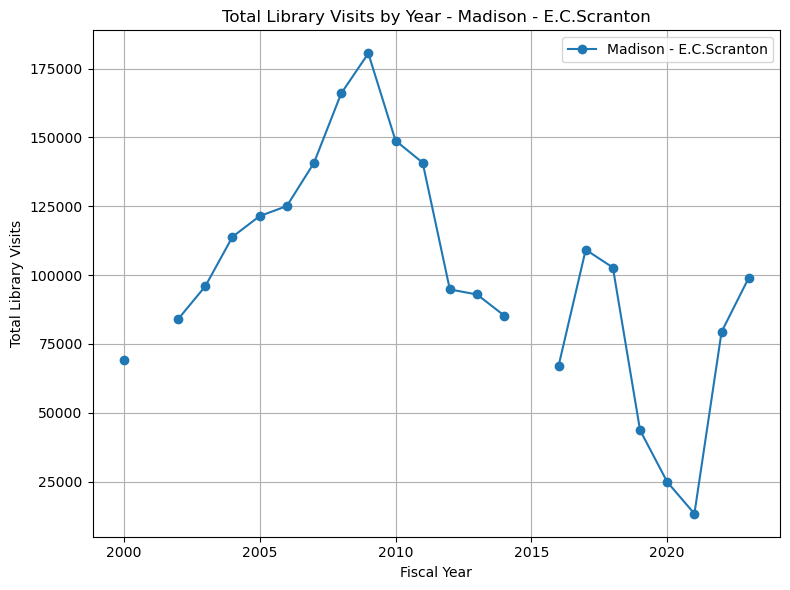

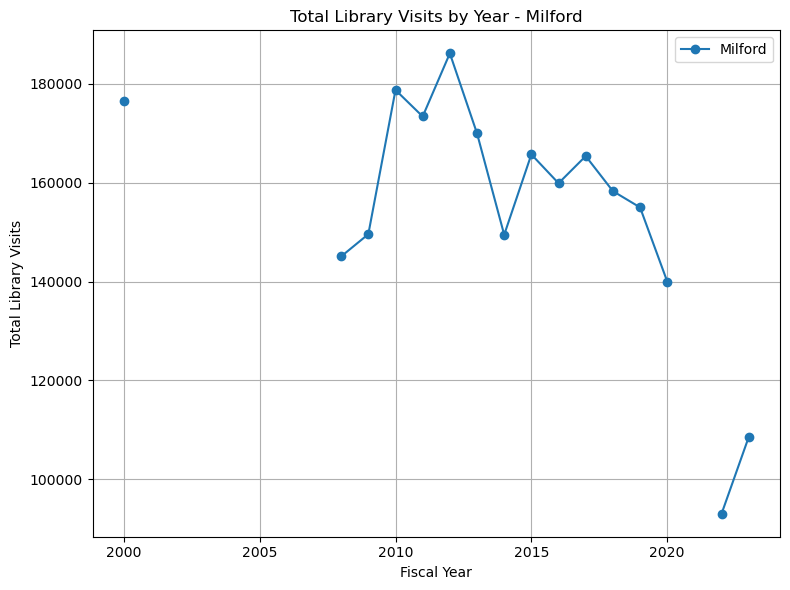

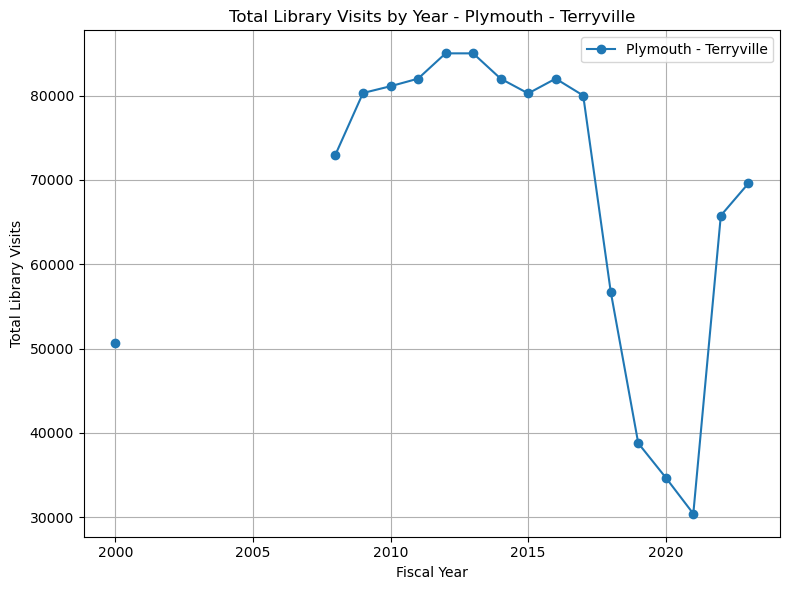

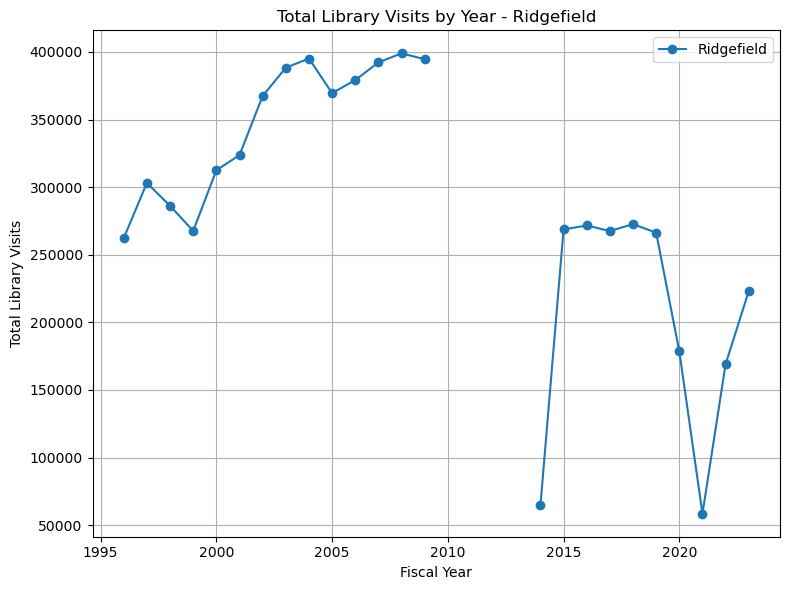

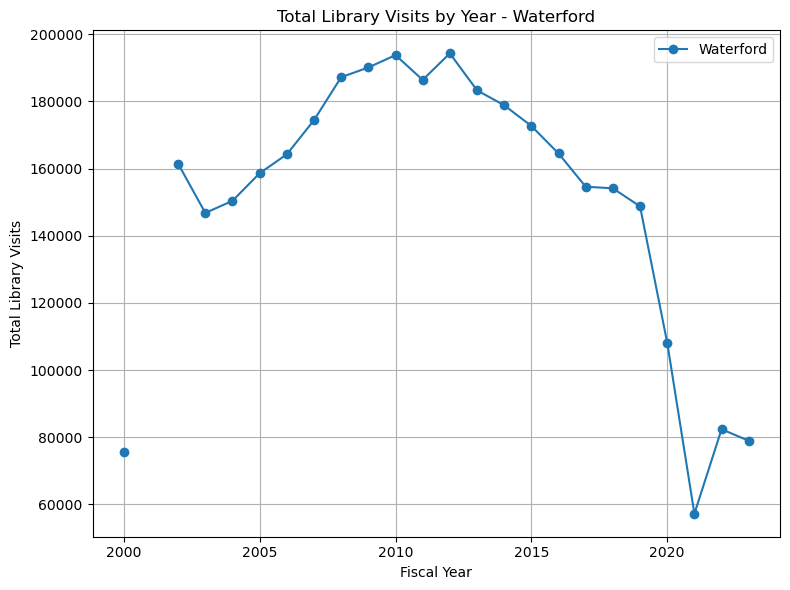

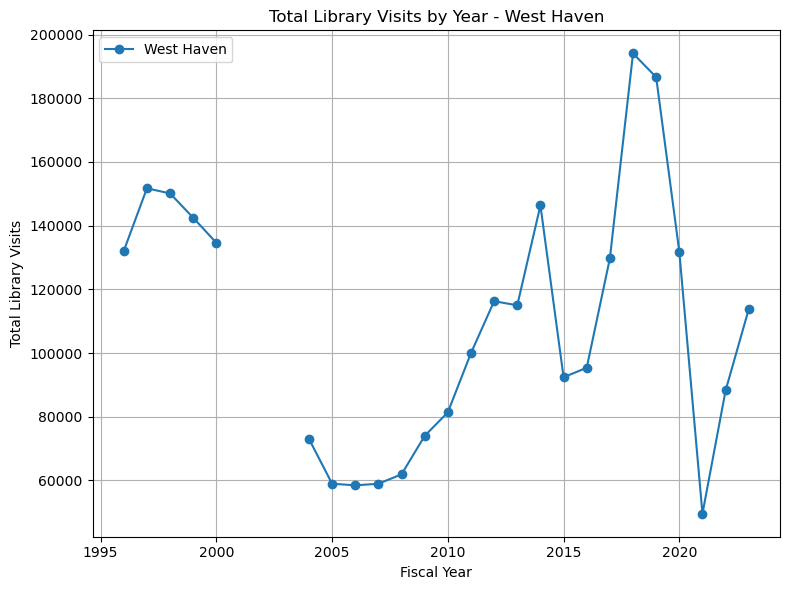

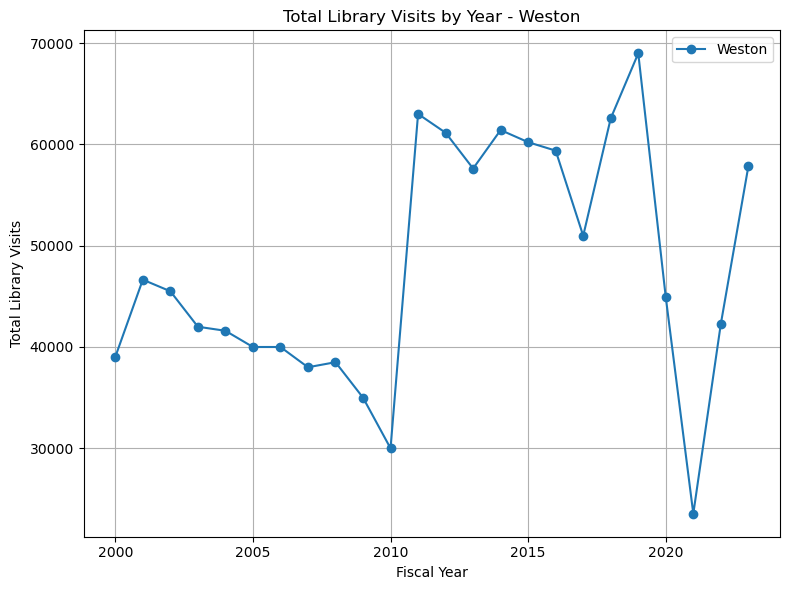

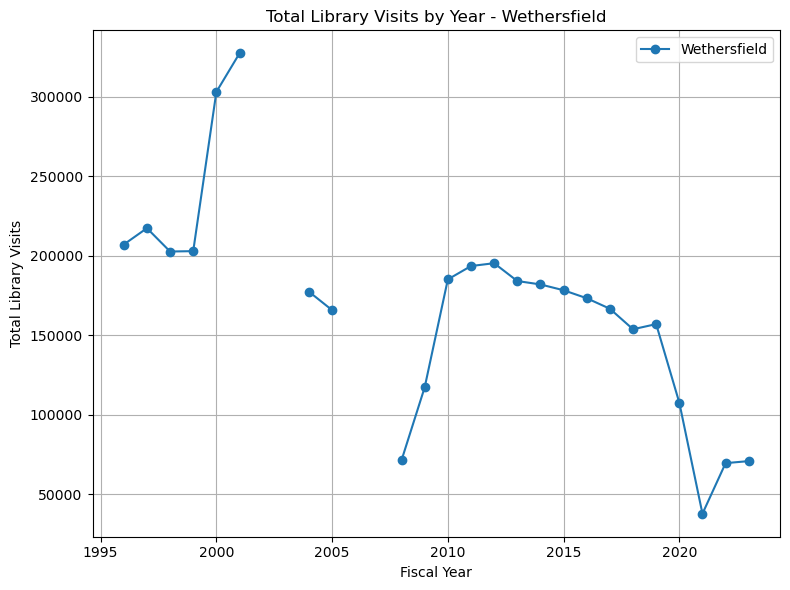

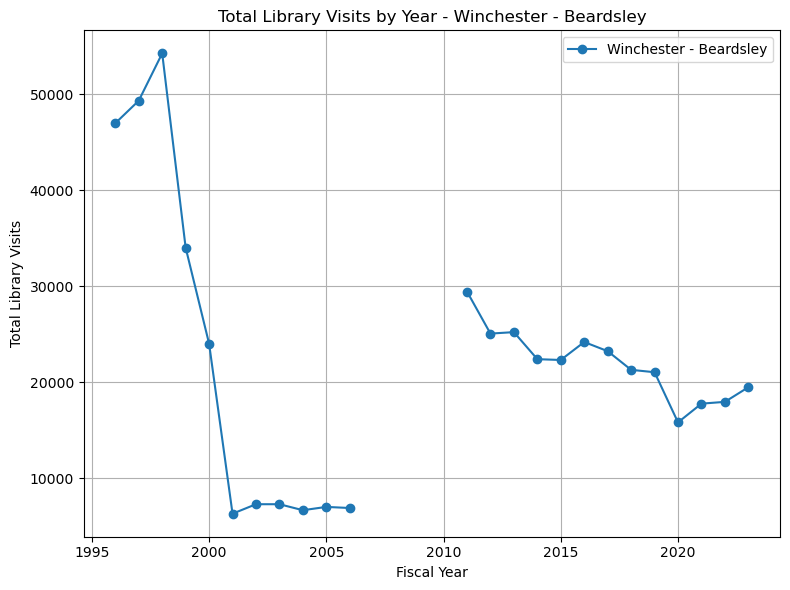

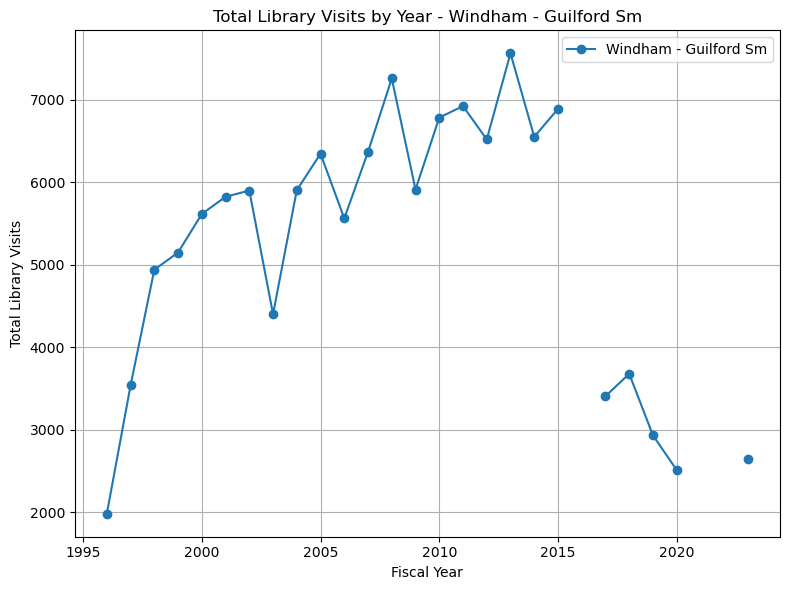

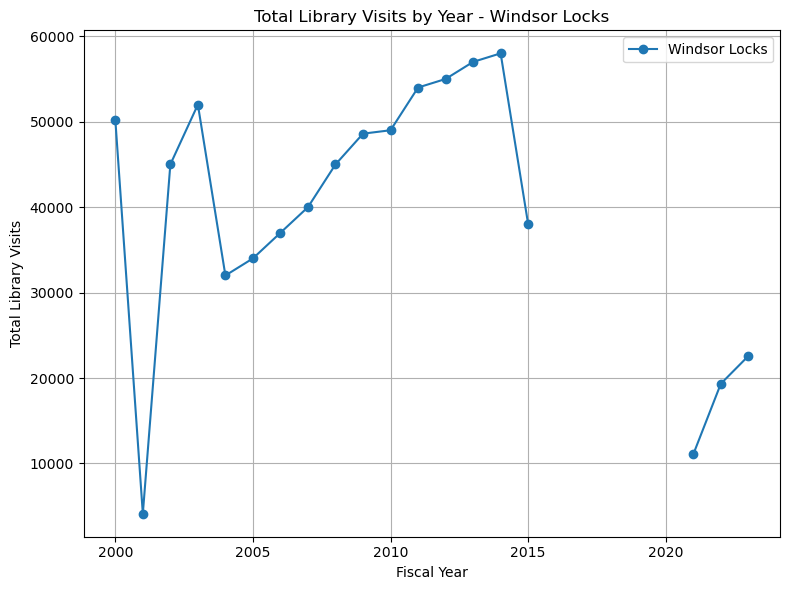

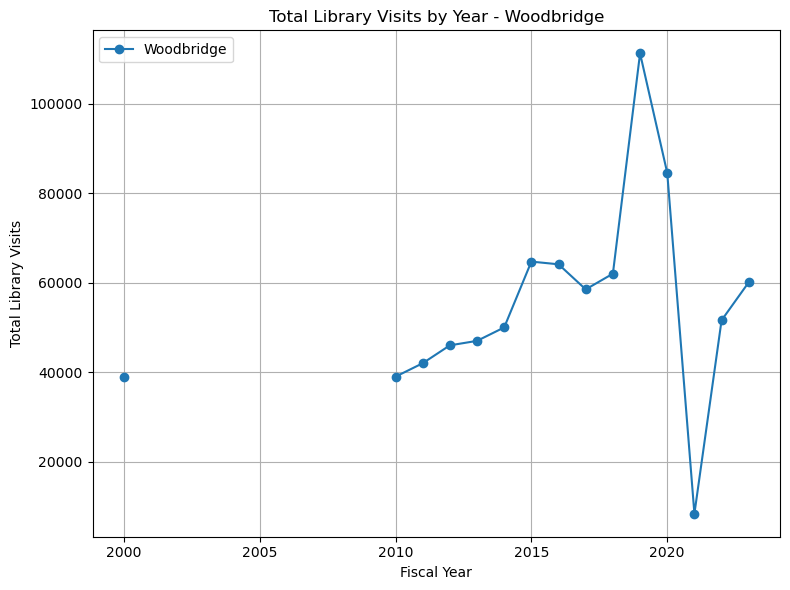

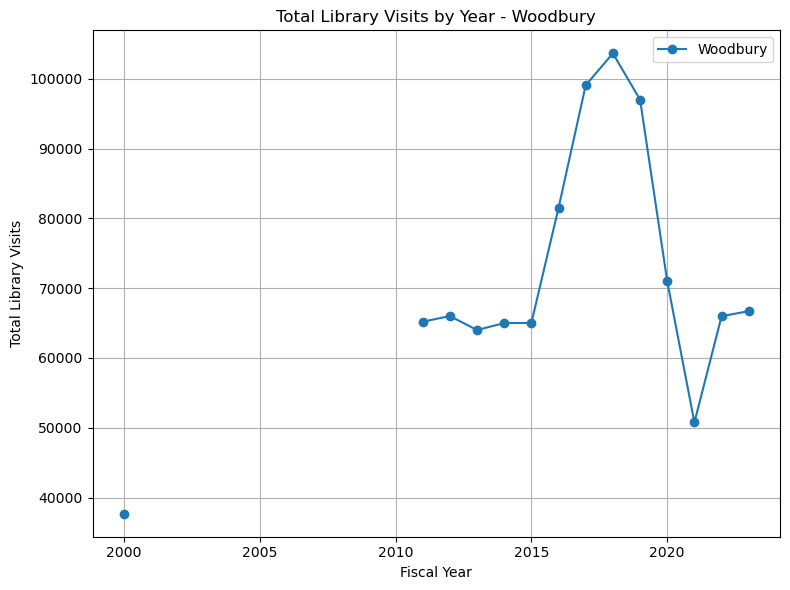

In [83]:
import matplotlib.pyplot as plt

# 1. זהה ספריות עם לפחות 3 ערכים חסרים בעמודת 'Total Library Visits'
missing_counts = df[df['Total Library Visits'].isnull()].groupby('Library').size()
libraries_with_missing = missing_counts[missing_counts >= 3].index

# 2. סינון הנתונים לספריות עם לפחות 3 ערכים חסרים
filtered_data = df[df['Library'].isin(libraries_with_missing)]

# 3. ציור גרף נפרד לכל ספרייה
for library in libraries_with_missing:
    library_data = filtered_data[filtered_data['Library'] == library]
    plt.figure(figsize=(8, 6))
    plt.plot(
        library_data['Fiscal Year'],
        library_data['Total Library Visits'],
        marker='o',
        label=library
    )
    plt.title(f'Total Library Visits by Year - {library}')
    plt.xlabel('Fiscal Year')
    plt.ylabel('Total Library Visits')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


### השלמנו את הערכים בעמודת סך הביקורים באמצעות זיהוי וניקוי ערכים חריגים , אינטרפולציה ליניארית למילוי ערכים חסרים, ומילוי ערכים שנותרו חסרים באמצעות ממוצע הספרייה.

In [84]:
import numpy as np

def clean_and_fill_library_visits(df, column_name):
    """
    פונקציה לניקוי ערכים חריגים ומילוי ערכים חסרים בעמודת 'Total Library Visits'.
    """
    # מציאת ערכים חריגים לפי 1.5*IQR
    def detect_outliers(group):
        Q1 = group.quantile(0.25)
        Q3 = group.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return (group < lower_bound) | (group > upper_bound)  # מסכה באותו גודל כמו הקבוצה

    # ניקוי ערכים חריגים: החלפתם ב-NaN
    df[column_name] = df.groupby('Library')[column_name].apply(
        lambda group: group.mask(detect_outliers(group))
    )

    # מציאת ספריות עם ערכים חסרים
    libraries_with_missing = df[df[column_name].isnull()]['Library'].unique()

    for library in libraries_with_missing:
        # סינון נתונים של ספרייה מסוימת
        library_data = df[df['Library'] == library].copy()
        
        # אינטרפולציה למילוי ערכים חסרים
        library_data[column_name] = library_data[column_name].interpolate(method='linear')
        
        # מילוי הערך הראשון אם עדיין חסר
        if library_data[column_name].isnull().iloc[0]:
            if library_data[column_name].notnull().any():
                first_valid_value = library_data[column_name].bfill().iloc[0]  # ערך הבא הזמין
            else:
                first_valid_value = library_data[column_name].mean()  # ממוצע הספרייה
            library_data[column_name].iloc[0] = first_valid_value
        
        # מילוי הערך האחרון אם עדיין חסר
        if library_data[column_name].isnull().iloc[-1]:
            last_valid_value = library_data[column_name].ffill().iloc[-1]  # ערך קודם זמין
            library_data[column_name].iloc[-1] = last_valid_value
        
        # עדכון ה-DataFrame הראשי
        df.loc[library_data.index, column_name] = library_data[column_name]

    # מילוי ערכים חסרים שנותרו לפי ממוצע הספרייה
    df[column_name] = df.groupby('Library')[column_name].apply(lambda group: group.fillna(group.mean()))

    return df

# יישום הפונקציה על עמודת 'Total Library Visits'
df = clean_and_fill_library_visits(df, 'Total Library Visits')


C:\Users\rotemb\AppData\Local\Temp\ipykernel_27584\1520868730.py:17: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df[column_name] = df.groupby('Library')[column_name].apply(
C:\Users\rotemb\AppData\Local\Temp\ipykernel_27584\1520868730.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  library_data[column_name].iloc[0] = first_valid_value
C:\Users\rotemb\AppData\Local\Temp\ipykernel_27584\1520868730.py:48: FutureWarning: Not prepending group keys to the 

In [85]:
df.isnull().sum()['Total Library Visits']

0

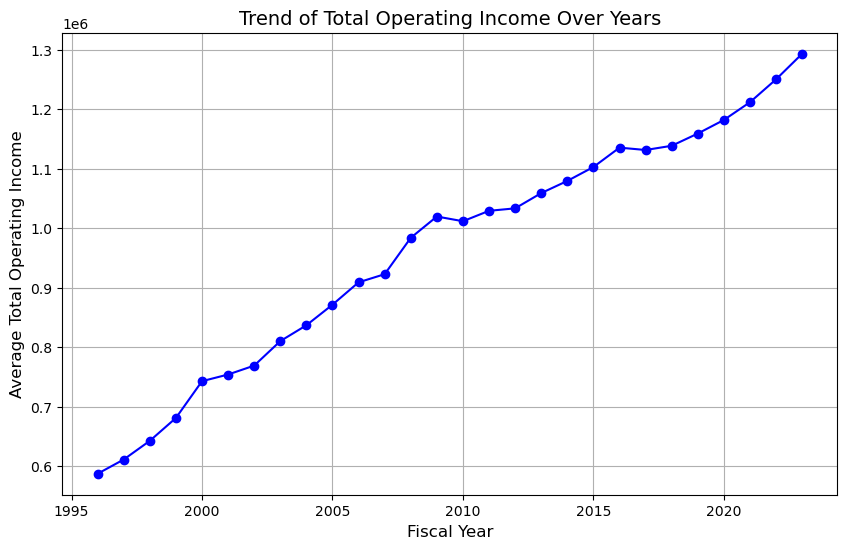

In [86]:
import matplotlib.pyplot as plt

# 1. סיכום ההכנסות לפי שנה
income_trend = df.groupby('Fiscal Year')['Total Operating Income'].mean()

# 2. יצירת גרף מגמה כללית
plt.figure(figsize=(10, 6))
plt.plot(income_trend.index, income_trend.values, marker='o', linestyle='-', color='b')
plt.title('Trend of Total Operating Income Over Years', fontsize=14)
plt.xlabel('Fiscal Year', fontsize=12)
plt.ylabel('Average Total Operating Income', fontsize=12)
plt.grid(True)
plt.show()


### בחרנו להשלים ערכי חסרים עבור עמודה זו ועוד 2 נוספות בעזרת רגרסיה לינארית

In [87]:
from sklearn.linear_model import LinearRegression
import numpy as np

def fill_missing_values_by_regression(df, column_to_fill, reference_column, group_by_column):
    """
    פונקציה למילוי ערכים חסרים בעזרת רגרסיה לפי קבוצה.
    
    פרמטרים:
    ----------
    df : pandas.DataFrame
        מסגרת הנתונים לעיבוד.
    column_to_fill : str
        שם העמודה שבה נרצה להשלים ערכים חסרים.
    reference_column : str
        שם עמודת ההתייחסות (X לרגרסיה, לדוגמה 'Fiscal Year').
    group_by_column : str
        שם העמודה לפיה מתבצע הקיבוץ (לדוגמה 'Library').
        
    מחזיר:
    -------
    pandas.DataFrame
        מסגרת הנתונים לאחר מילוי הערכים החסרים.
    """
    # מעבר על כל קבוצה בעמודה group_by_column
    for group in df[group_by_column].unique():
        # סינון נתונים עבור הקבוצה הנוכחית
        group_data = df[df[group_by_column] == group]
        
        # הכנת הנתונים לרגרסיה
        X = group_data[reference_column].values.reshape(-1, 1)  # עמודת ההתייחסות (X)
        y = group_data[column_to_fill].values  # עמודה למילוי (y)
        
        # מסיכה לערכים תקינים
        valid_mask = ~np.isnan(y)
        
        # אם יש מספיק נתונים לאימון מודל
        if valid_mask.sum() > 1:  # צריך לפחות 2 ערכים כדי לאמן מודל רגרסיה
            # יצירת מודל רגרסיה
            model = LinearRegression()
            model.fit(X[valid_mask], y[valid_mask])  # אימון על ערכים תקינים
            
            # מסיכה לערכים חסרים
            missing_mask = np.isnan(y)
            
            # חיזוי הערכים החסרים
            if missing_mask.any():
                X_missing = X[missing_mask]
                predictions = model.predict(X_missing)
                
                # עדכון הערכים החסרים ב-DataFrame המקורי
                df.loc[group_data.index[missing_mask], column_to_fill] = predictions
                
    return df


In [88]:
# רשימת העמודות למילוי ערכים חסרים
columns_to_fill = [
    'Operating Expenditures',
    'Total Operating Income',
    'Town Tax Appropriation for Library'
]

# מעבר על כל עמודה ברשימה והפעלת הפונקציה
for column in columns_to_fill:
    df = fill_missing_values_by_regression(
        df=df,
        column_to_fill=column,
        reference_column='Fiscal Year',  # עמודת ההתייחסות
        group_by_column='Library'  # עמודת הקבוצות
    )


In [89]:
df.isnull().sum()

Fiscal Year                                             0
Library                                                 0
County                                                  0
Principal Public?                                       0
AENGLC Rank                                            20
Population of Service Area                             89
Total Library Visits                                    0
Library Visits Per Capita Served                      161
Total Registered Borrowers                             50
Percent of Residents with Library Cards                50
Total Circulation                                      15
Circulation Per Capita Served                          17
Total Programs (Synchronous + Prerecorded)             80
Total Program Attendance & Views                      104
Total Program Attendance & Views Per Capita Served    108
Total Collection                                       16
Collection Per Capita Served                           26
Total Operatin

In [90]:
# סינון הנתונים כך שיסירו את ספריית "Hartland"
df = df[df['Library'] != 'Hartland']
df = df[df['Library'] != 'Norfolk']

### בעמודה הבאה בחרנו להשלים לפי השלמה קדימה ואחורה

In [91]:
def fill_missing_and_zero_values(df, column_name):
    """
    פונקציה להשלמת ערכים חסרים ואפסים בעמודה מסוימת.
    """
    # החלפת ערכים של 0 ל-NaN
    df[column_name] = df[column_name].replace(0, pd.NA)
    
    # מיון הנתונים לפי Library ו-Fiscal Year
    df = df.sort_values(by=['Library', 'Fiscal Year']).reset_index(drop=True)
    
    # השלמת ערכים חסרים קדימה ואחורה עבור כל ספרייה בנפרד
    df[column_name] = df.groupby('Library')[column_name].ffill()
    df[column_name] = df.groupby('Library')[column_name].bfill()
    
    return df

# יישום הפונקציה על עמודת 'Total Collection' ב-df
df = fill_missing_and_zero_values(df, 'Total Collection')


In [92]:
df.isnull().sum()['Total Collection']

0

### טיפול בעמודת הוצאות על חומרי עבודה בספריה, ראינו שעד שנת 2002 ישנה עליה ולאחר מכן ישנו גרף לא סדיר ולכן החלטנו לנקוט שתי דרכי פעולה ולחתוך בין השנים

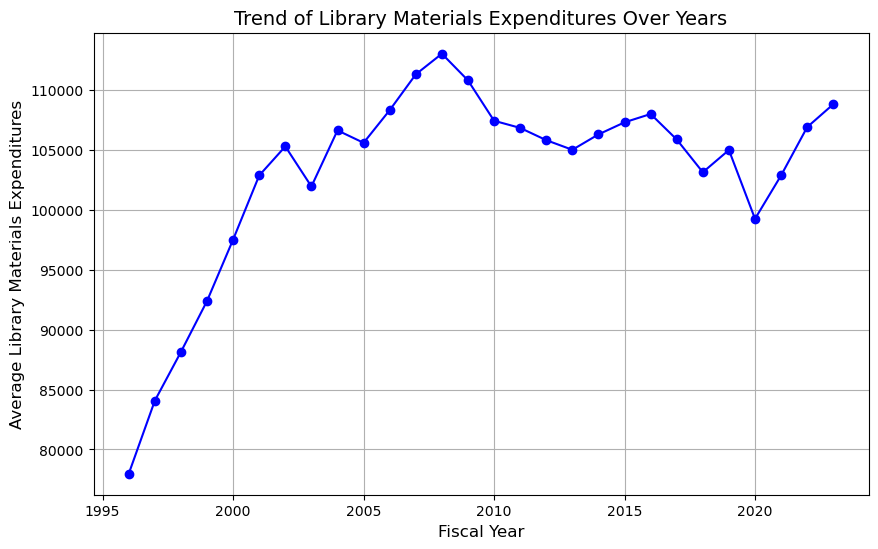

In [93]:
# 1. סיכום ההכנסות לפי שנה
income_trend = df.groupby('Fiscal Year')['Library Materials Expenditures'].mean()

# 2. יצירת גרף מגמה כללית
plt.figure(figsize=(10, 6))
plt.plot(income_trend.index, income_trend.values, marker='o', linestyle='-', color='b')
plt.title('Trend of Library Materials Expenditures Over Years', fontsize=14)
plt.xlabel('Fiscal Year', fontsize=12)
plt.ylabel('Average Library Materials Expenditures', fontsize=12)
plt.grid(True)
plt.show()



In [94]:
# מילוי ערכים חסרים בעמודת 'Library Materials Expenditures'
for library in df['Library'].unique():
    # מילוי ערכים חסרים אחרי שנת 2002
    df.loc[
        (df['Library'] == library) & 
        (df['Fiscal Year'] >= 2002) & 
        (df['Library Materials Expenditures'].isnull()),
        'Library Materials Expenditures'
    ] = df[
        (df['Library'] == library) & 
        (df['Fiscal Year'] >= 2002)
    ]['Library Materials Expenditures'].mean()

    # מילוי ערכים חסרים לפני שנת 2002
    df.loc[
        (df['Library'] == library) & 
        (df['Fiscal Year'] < 2002) & 
        (df['Library Materials Expenditures'].isnull()),
        'Library Materials Expenditures'
    ] = df[
        (df['Library'] == library) & 
        (df['Fiscal Year'] < 2002)
    ]['Library Materials Expenditures'].mean()


In [95]:
df.isnull().sum()['Library Materials Expenditures']

0

### נשלים את עמודת המשכורות באמצעות אינטרפולציה לינארית

In [96]:
# אינטרפולציה לינארית עבור עמודת 'Wages & Salaries Expenditures'
df['Wages & Salaries Expenditures'] = df['Wages & Salaries Expenditures'].interpolate(method='linear')

In [97]:
df.isnull().sum()['Wages & Salaries Expenditures']

0

### נסתכל על עמודת כמות התכניות ועמודת כמו ההגעות והצפיות

                                            Total Programs (Synchronous + Prerecorded)  \
Total Programs (Synchronous + Prerecorded)                                    1.000000   
Total Program Attendance & Views                                              0.851998   

                                            Total Program Attendance & Views  
Total Programs (Synchronous + Prerecorded)                          0.851998  
Total Program Attendance & Views                                    1.000000  


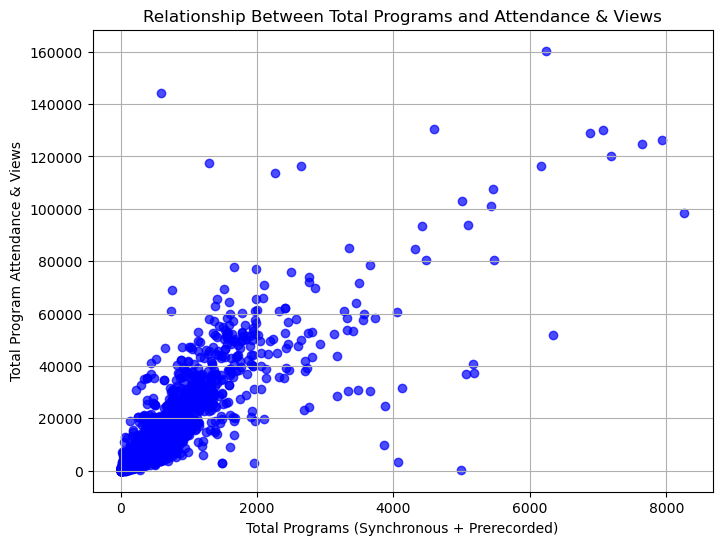

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. חישוב קורלציה בין העמודות
print(df[['Total Programs (Synchronous + Prerecorded)', 'Total Program Attendance & Views']].corr())


# 2. סינון נתונים שבהם לשתי העמודות יש ערכים
valid_data = df[['Total Programs (Synchronous + Prerecorded)', 'Total Program Attendance & Views']].dropna()

# 3. יצירת גרף פיזור
plt.figure(figsize=(8, 6))
plt.scatter(
    valid_data['Total Programs (Synchronous + Prerecorded)'], 
    valid_data['Total Program Attendance & Views'], 
    alpha=0.7, 
    color='blue'
)
plt.title('Relationship Between Total Programs and Attendance & Views')
plt.xlabel('Total Programs (Synchronous + Prerecorded)')
plt.ylabel('Total Program Attendance & Views')
plt.grid(True)
plt.show()


In [99]:
def fill_missing_related_columns(df, col1, col2, group_col):
    """
    פונקציה להשלמת ערכים חסרים בין שתי עמודות הקשורות זו לזו על פי יחס ממוצע בקבוצות.
    
    פרמטרים:
    ----------
    df : pandas.DataFrame
        מסגרת הנתונים לעיבוד.
    col1 : str
        שם העמודה הראשונה (שמשמשת לחישוב יחס ומילוי).
    col2 : str
        שם העמודה השנייה (שמשמשת לחישוב יחס ומילוי).
    group_col : str
        שם העמודה לקיבוץ (לדוגמה 'Library').
        
    מחזיר:
    -------
    pandas.DataFrame
        מסגרת הנתונים לאחר השלמת הערכים החסרים.
    """
    # 1. מציאת יחס ממוצע לכל קבוצה
    ratios = {}
    for group in df[group_col].unique():
        group_data = df[df[group_col] == group]
        valid_rows = group_data.dropna(subset=[col1, col2])
        if not valid_rows.empty:
            ratios[group] = (valid_rows[col2] / valid_rows[col1]).mean()
    
    # 2. השלמת ערכים חסרים על בסיס היחס
    for group, ratio in ratios.items():
        if not np.isnan(ratio):
            group_data = df[df[group_col] == group]
            
            # השלמת col2 לפי col1
            missing_col2 = group_data[group_data[col2].isnull() & group_data[col1].notnull()]
            df.loc[missing_col2.index, col2] = missing_col2[col1] * ratio
            
            # השלמת col1 לפי col2
            missing_col1 = group_data[group_data[col1].isnull() & group_data[col2].notnull()]
            df.loc[missing_col1.index, col1] = missing_col1[col2] / ratio

    # 3. אינטרפולציה ו-Backfill
    def safe_interpolate(group):
        if len(group.dropna()) >= 4:  # לפחות 4 נקודות לאינטרפולציה מסדר 3
            return group.interpolate(method='spline', order=3).bfill()
        else:
            return group.interpolate(method='linear').bfill()

    df[col1] = df.groupby(group_col, group_keys=False)[col1].apply(safe_interpolate)
    df[col2] = df.groupby(group_col, group_keys=False)[col2].apply(lambda x: x.bfill())
    
    return df
df = fill_missing_related_columns(df, 
                                  'Total Programs (Synchronous + Prerecorded)', 
                                  'Total Program Attendance & Views', 
                                  'Library')


In [100]:
df.isnull().sum()['Total Programs (Synchronous + Prerecorded)']

0

In [101]:
df.isnull().sum()['Total Program Attendance & Views']

0

### נסתכל על עמודת הדירוג הכלכלי לאותו איזור

In [102]:
# מילוי ערכים חסרים בעמודת 'AENGLC Rank' לפי ממוצע הקבוצות בעמודת 'Library'
means = df.groupby('Library')['AENGLC Rank'].transform('mean')
df['AENGLC Rank'] = df['AENGLC Rank'].fillna(means)

In [103]:
df.isnull().sum()['AENGLC Rank']

0

In [104]:
def fill_registered_borrowers(df):
    """
    פונקציה למילוי ערכים חסרים בעמודת 'Total Registered Borrowers' עבור דאטה מסוים.
    """
    # זיהוי ספריות עם ערכים חסרים בעמודת 'Total Registered Borrowers'
    libraries_with_missing = df[df['Total Registered Borrowers'].isnull()]['Library'].unique()

    # מילוי הערכים עבור כל ספרייה
    for library in libraries_with_missing:
        # שליפת הנתונים של הספרייה
        library_data = df[df['Library'] == library].copy()

        # אינטרפולציה למילוי ערכים באמצע
        library_data['Total Registered Borrowers'] = library_data['Total Registered Borrowers'].interpolate(method='linear')

        # בדיקה אם נשארו ערכים חסרים לאחר אינטרפולציה
        if library_data['Total Registered Borrowers'].isnull().any():
            # חישוב ממוצע הערכים בספרייה
            library_mean = library_data['Total Registered Borrowers'].mean()

            # מילוי ערכים חסרים בממוצע הספרייה
            library_data['Total Registered Borrowers'] = library_data['Total Registered Borrowers'].fillna(library_mean)

        # עדכון ה-DataFrame הראשי
        df.loc[library_data.index, 'Total Registered Borrowers'] = library_data['Total Registered Borrowers']

    return df

# יישום הפונקציה על DataFrame יחיד
df = fill_registered_borrowers(df)


In [105]:
df.isnull().sum()['Total Registered Borrowers']

0

### נסתכל על עמודת האכולוסיה המשורתת של אותה ספריה.

In [106]:
# סינון ספריות שבהן חסרים ערכים בעמודת 'Population of Service Area'
libraries_with_missing_population = df[df['Population of Service Area'].isnull()]['Library'].unique()

# הצגת הספריות
print("ספריות עם ערכים חסרים בעמודת 'Population of Service Area':")
for library in libraries_with_missing_population:
    print(library)

    

ספריות עם ערכים חסרים בעמודת 'Population of Service Area':
Branford - Willoughby
Groton - Bill
Groton - Mystic
Ridgefield
Windham - Guilford Sm
Woodstock - Bracken


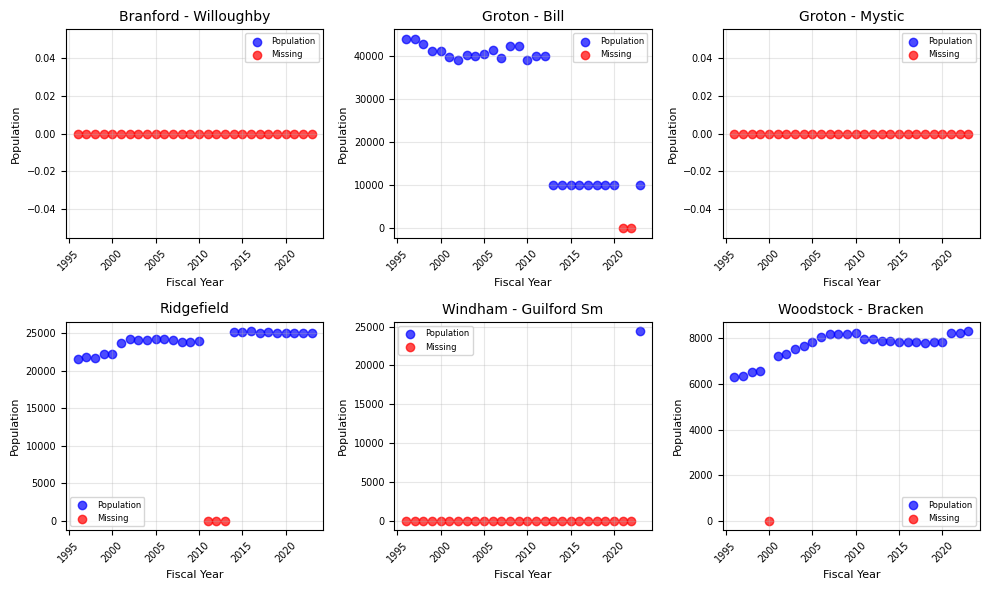

In [107]:
import matplotlib.pyplot as plt
import numpy as np

# רשימת הספריות עם ערכים חסרים
libraries_with_missing_population = [
    "Branford - Willoughby",
    "Groton - Bill",
    "Groton - Mystic",
    "Ridgefield",
    "Windham - Guilford Sm",
    "Woodstock - Bracken"
]

# סינון הנתונים עבור הספריות הללו
missing_data = df[df['Library'].isin(libraries_with_missing_population)]

# יצירת גרף נפרד לכל ספרייה
num_libraries = len(libraries_with_missing_population)
plt.figure(figsize=(10, 6))

for i, library in enumerate(libraries_with_missing_population, 1):
    # נתונים עבור ספרייה ספציפית
    library_data = missing_data[missing_data['Library'] == library]
    
    # ערכי X (שנים) ו-Y (אוכלוסייה)
    x = library_data['Fiscal Year']
    y = library_data['Population of Service Area']
    
    # זיהוי ערכים חסרים
    missing_mask = y.isnull()
    
    # גרף פיזור
    plt.subplot(2, (num_libraries + 1) // 2, i)
    plt.scatter(x, y, label="Population", color="blue", alpha=0.7)
    plt.scatter(x[missing_mask], [0] * missing_mask.sum(), label="Missing", color="red", alpha=0.7)
    plt.title(library, fontsize=10)
    plt.xlabel("Fiscal Year", fontsize=8)
    plt.ylabel("Population", fontsize=8)
    plt.xticks(rotation=45, fontsize=7)
    plt.yticks(fontsize=7)
    plt.grid(alpha=0.3)
    plt.legend(fontsize=6)

plt.tight_layout()
plt.show()


### החלטנו להוריד ספריות שעבורן לא היו ערכים עבור האוכלוסיות מאחר וזו עמודה חשובה מאוד עבורינו. ואת השאר החלטנו להשלים בערך השלמה אחורה קדימה של הנתונים. 

In [108]:
# רשימת הספריות להסרה
libraries_to_remove = ["Windham - Guilford Sm", "Branford - Willoughby", "Groton - Mystic",]

# הסרת הספריות מהנתונים
df = df[~df['Library'].isin(libraries_to_remove)].copy()

# השלמה אחורה וקדימה לפי סדר השנים לכל ספרייה
df = df.sort_values(by=['Library', 'Fiscal Year']).reset_index(drop=True)
df['Population of Service Area'] = df.groupby('Library', group_keys=False)['Population of Service Area'].apply(
    lambda group: group.fillna(method='bfill').fillna(method='ffill')
)

### נסתכל על עמודת מספר ההשאלות בספריה 

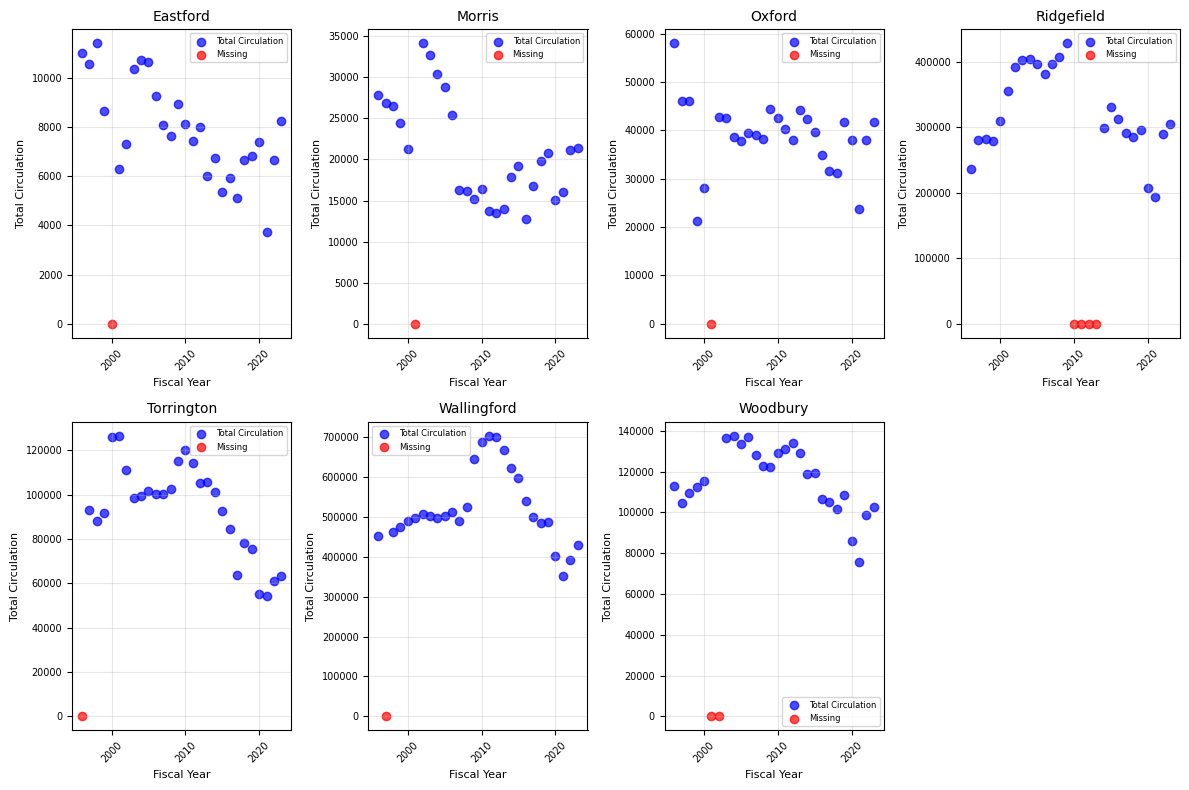

In [109]:
import matplotlib.pyplot as plt

# רשימת הספריות עם ערכים חסרים בעמודת 'Total Circulation'
libraries_with_missing_circulation = df[df['Total Circulation'].isnull()]['Library'].unique()

# סינון הנתונים עבור הספריות הללו
missing_circulation_data = df[df['Library'].isin(libraries_with_missing_circulation)]

# יצירת גרף נפרד לכל ספרייה
num_libraries = len(libraries_with_missing_circulation)
plt.figure(figsize=(12, 8))

for i, library in enumerate(libraries_with_missing_circulation, 1):
    # נתונים עבור ספרייה ספציפית
    library_data = missing_circulation_data[missing_circulation_data['Library'] == library]
    
    # ערכי X (שנים) ו-Y (Total Circulation)
    x = library_data['Fiscal Year']
    y = library_data['Total Circulation']
    
    # זיהוי ערכים חסרים
    missing_mask = y.isnull()
    
    # גרף פיזור
    plt.subplot(2, (num_libraries + 1) // 2, i)
    plt.scatter(x, y, label="Total Circulation", color="blue", alpha=0.7)
    plt.scatter(x[missing_mask], [0] * missing_mask.sum(), label="Missing", color="red", alpha=0.7)
    plt.title(library, fontsize=10)
    plt.xlabel("Fiscal Year", fontsize=8)
    plt.ylabel("Total Circulation", fontsize=8)
    plt.xticks(rotation=45, fontsize=7)
    plt.yticks(fontsize=7)
    plt.grid(alpha=0.3)
    plt.legend(fontsize=6)

plt.tight_layout()
plt.show()


### נשלים בעזרת אינטרפולציה לינארית.

In [110]:
def fill_missing_circulation(df):
    """
    פונקציה למילוי ערכים חסרים בעמודת 'Total Circulation' באמצעות שילוב של אינטרפולציה, backfill ו-forward fill.
    """
    # מיון הנתונים לפי ספרייה ושנה
    df = df.sort_values(by=['Library', 'Fiscal Year']).reset_index(drop=True)

    # מילוי ערכים חסרים עם אינטרפולציה ליניארית
    df['Total Circulation'] = df.groupby('Library', group_keys=False)['Total Circulation'].apply(
        lambda group: group.interpolate(method='linear')
    )

    # השלמה אחורה וקדימה לערכים שעדיין חסרים
    df['Total Circulation'] = df.groupby('Library', group_keys=False)['Total Circulation'].apply(
        lambda group: group.fillna(method='bfill').fillna(method='ffill')
    )

    return df

# יישום הפונקציה על הנתונים
df = fill_missing_circulation(df)


### נשלים את הערכים החסרים בעמודת פר נפש לפי חילוץ שלהם מהעמודות הכלליות של אותה שנה ובעזרת עמודת האוכלוסיה המשורתת. 

In [111]:
# זיהוי הספריות שבהן יש ערכים חריגים בעמודת 'Percent of Residents with Library Cards'
outlier_libraries = df[df['Percent of Residents with Library Cards'] > 1]['Library'].value_counts()

# הצגת הספריות עם מספר הערכים החריגים בכל ספרייה
print("ספריות עם ערכים חריגים (אחוזי מחזיקי כרטיסים מעל 1):")
print(outlier_libraries)


ספריות עם ערכים חריגים (אחוזי מחזיקי כרטיסים מעל 1):
East Lyme                  8
Woodbridge                 6
Wilton                     5
Roxbury - Minor            4
Deep River                 4
Fairfield                  4
Goshen                     4
Groton                     4
Clinton - Henry C. Hull    3
Washington - Gunn          3
North Canaan - Douglas     3
New London                 3
Cornwall                   3
New Fairfield              2
Norwich - Otis             2
Salem                      2
Voluntown                  2
Colchester - Cragin        2
Old Saybrook - Acton       1
Darien                     1
Westbrook                  1
Andover                    1
Name: Library, dtype: int64


### נטפל בעמודת הערך של אחוז מחזיקי כרטיס ביחס לאוכלוסיה ואם הוא גבוה מ1 ניתן לו ערך 1 כדי שלאיחרוג מההגיון שערך "אחוזי"  יכול לקבל ערך של בין 0-100% וכך גם כאן. 

count    4413.000000
mean        0.508781
std         0.198159
min         0.000000
25%         0.370000
50%         0.480000
75%         0.630000
max         1.000000
Name: Percent of Residents with Library Cards, dtype: float64


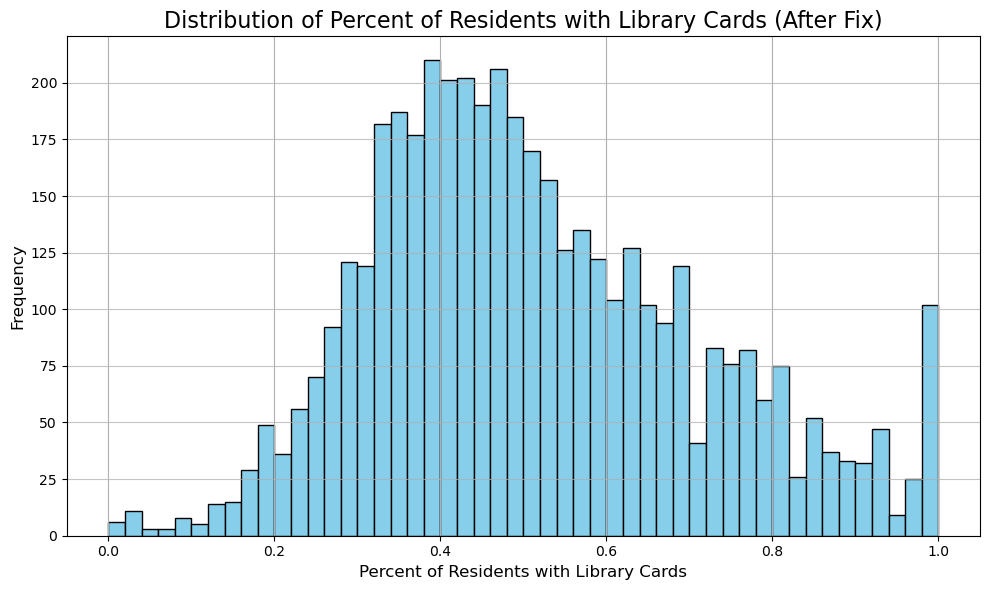

In [112]:
# תיקון הערכים החריגים: ערכים מעל 1 מוחלפים ב-1
df['Percent of Residents with Library Cards'] = df['Percent of Residents with Library Cards'].clip(upper=1)

# הצגת סקירה כללית של העמודה לאחר התיקון
print(df['Percent of Residents with Library Cards'].describe())

# הצגת גרף ההתפלגות לאחר התיקון
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['Percent of Residents with Library Cards'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Percent of Residents with Library Cards (After Fix)', fontsize=16)
plt.xlabel('Percent of Residents with Library Cards', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()


In [113]:
def fill_per_capita_columns(df, per_capita_columns, total_columns, population_column):
    """
    פונקציה למילוי ערכים חסרים בעמודות 'פר נפש' על ידי חלוקת עמודת האב בעמודת האוכלוסייה.

    Parameters:
        df (DataFrame): הדאטה שבו נרצה להשלים ערכים.
        per_capita_columns (list): רשימת עמודות 'פר נפש' שבהן יש ערכים חסרים.
        total_columns (list): רשימת עמודות האב המתאימות.
        population_column (str): שם עמודת האוכלוסייה.

    Returns:
        DataFrame: הדאטה עם ערכים חסרים מושלמים.
    """
    for per_capita_col, total_col in zip(per_capita_columns, total_columns):
        # זיהוי שורות עם ערכים חסרים בעמודת 'פר נפש' ונתונים קיימים בעמודת האב והאוכלוסייה
        missing_mask = df[per_capita_col].isnull() & df[total_col].notnull() & df[population_column].notnull()
        
        # מילוי הערכים החסרים
        df.loc[missing_mask, per_capita_col] = df.loc[missing_mask, total_col] / df.loc[missing_mask, population_column]
        
        # השלמה נוספת עם ממוצע הקבוצה (לפי ספרייה)
        df[per_capita_col] = df.groupby('Library', group_keys=False)[per_capita_col].apply(
            lambda group: group.fillna(group.mean())
        )
    
    return df

# רשימת כל עמודות ה-per capita ועמודות האב שלהן
per_capita_columns = [
    'Library Visits Per Capita Served', 
    'Percent of Residents with Library Cards',
    'Circulation Per Capita Served',
    'Total Program Attendance & Views Per Capita Served',
    'Collection Per Capita Served',
    'Operating Income Per Capita',
    'Tax Appropriation Per Capita Served',
    'Operating Expenditures Per Capita'
]
total_columns = [
    'Total Library Visits',
    'Total Registered Borrowers',
    'Total Circulation',
    'Total Program Attendance & Views',
    'Total Collection',
    'Total Operating Income',
    'Town Tax Appropriation for Library',
    'Operating Expenditures'
]
population_column = 'Population of Service Area'

# יישום הפונקציה על הנתונים
df = fill_per_capita_columns(df, per_capita_columns, total_columns, population_column)

In [114]:
df.isnull().sum()

Fiscal Year                                           0
Library                                               0
County                                                0
Principal Public?                                     0
AENGLC Rank                                           0
Population of Service Area                            0
Total Library Visits                                  0
Library Visits Per Capita Served                      0
Total Registered Borrowers                            0
Percent of Residents with Library Cards               0
Total Circulation                                     0
Circulation Per Capita Served                         0
Total Programs (Synchronous + Prerecorded)            0
Total Program Attendance & Views                      0
Total Program Attendance & Views Per Capita Served    0
Total Collection                                      0
Collection Per Capita Served                          0
Total Operating Income                          

In [115]:
df.shape

(4452, 25)

### יצירת עמודות נוספות

In [116]:

# רשימת העמודות לחישוב לפי נפש
columns_to_create = {
    'Wages & Salaries Expenditures': 'Wages & Salaries Expenditures Per Capita',
    'Library Materials Expenditures': 'Library Materials Expenditures Per Capita'
}

# חישוב עמודות לכל נפש
for total_col, per_capita_col in columns_to_create.items():
    if total_col in df.columns:
        df[per_capita_col] = df[total_col] / df['Population of Service Area']
# חישוב עמודת רווח לנפש לפי המשוואה
df['Profit Per Capita'] = (
    df['Operating Income Per Capita'] +
    df['Tax Appropriation Per Capita Served'] -
    df['Operating Expenditures Per Capita'] -
    df['Wages & Salaries Expenditures Per Capita'] -
    df['Library Materials Expenditures Per Capita']
)

# הצגת העמודות החדשות שנוצרו
print(df[['Profit Per Capita'] + list(columns_to_create.values())].head())
df.describe()

   Profit Per Capita  Wages & Salaries Expenditures Per Capita  \
0           8.510657                                 11.011012   
1           9.481646                                 12.020848   
2           7.262993                                 13.017883   
3          10.997719                                 14.543509   
4           6.092807                                 15.280351   

   Library Materials Expenditures Per Capita  
0                                   3.578330  
1                                   3.667505  
2                                   5.309124  
3                                   3.328772  
4                                   3.216842  


Fiscal Year  AENGLC Rank  Population of Service Area  \
count  4452.000000  4452.000000                 4452.000000   
mean   2009.500000    85.091634                21432.021788   
std       8.078655    49.332190                25381.380075   
min    1996.000000     1.000000                  632.000000   
25%    2002.750000    42.000000                 6091.750000   
50%    2009.500000    85.000000                12932.500000   
75%    2016.250000   128.000000                25287.500000   
max    2023.000000   169.000000               148698.000000   

       Total Library Visits  Library Visits Per Capita Served  \
count           4452.000000                       4452.000000   
mean          115848.128779                          5.711879   
std           142100.083847                          3.762508   
min              705.000000                          0.100000   
25%            23837.000000                          3.000000   
50%            63737.500000                          5.000000   
75%           149114.281250                          7.500000   
max           989139.000000                         25.700000   

       Total Registered Borrowers  Percent of Residents with Library Cards  \
count                 4452.000000                              4452.000000   
mean                 10074.379519                                 0.510139   
std                  11983.717053                                 0.200097   
min                    148.000000                                 0.000000   
25%                   2933.500000                                 0.370000   
50%                   5828.000000                                 0.480000   
75%                  12107.500000                                 0.630000   
max                 110832.000000                                 1.341826   

       Total Circulation  Circulation Per Capita Served  \
count       4.452000e+03                    4452.000000   
mean        1.615157e+05                       8.367435   
std         1.947067e+05                       5.215942   
min         1.656000e+03                       0.300000   
25%         3.770550e+04                       4.700000   
50%         8.884950e+04                       7.500000   
75%         2.117470e+05                      10.900000   
max         1.546762e+06                      39.000000   

       Total Programs (Synchronous + Prerecorded)  ...  \
count                                 4452.000000  ...   
mean                                   429.476100  ...   
std                                    604.995893  ...   
min                                    -44.010523  ...   
25%                                    131.000000  ...   
50%                                    269.000000  ...   
75%                                    488.250000  ...   
max                                   8265.000000  ...   

       Operating Income Per Capita  Town Tax Appropriation for Library  \
count                  4452.000000                        4.452000e+03   
mean                     46.435988                        8.596120e+05   
std                      32.834724                        1.282128e+06   
min                       0.330000                        0.000000e+00   
25%                      27.600000                        1.315682e+05   
50%                      38.430000                        4.173075e+05   
75%                      55.177500                        9.995108e+05   
max                     312.150000                        9.928669e+06   

       Tax Appropriation Per Capita Served  Library Materials Expenditures  \
count                          4452.000000                    4.452000e+03   
mean                             36.906863                    1.044562e+05   
std                              23.784538                    1.516109e+05   
min                               0.000000                    2.430000e+02   
25%                              22.74

In [117]:
# זיהוי עמודות מספריות
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# יצירת DataFrame לאחסון חריגים
outliers_summary = []

# לולאה שעוברת על כל ספריה
for library, group in df.groupby('Library'):
    for col in numeric_columns:
        mean = group[col].mean()  # ממוצע העמודה עבור הספרייה
        std = group[col].std()    # סטיית התקן של העמודה עבור הספרייה
        
        # סינון הערכים החריגים בתוך הספרייה
        outliers = group[(group[col] > (mean + 4 * std)) | (group[col] < (mean - 4 * std))]
        
        # הוספת החריגים לרשימה אם קיימים
        if not outliers.empty:
            for idx, row in outliers.iterrows():
                outliers_summary.append({
                    'Library': library,
                    'Column': col,
                    'Value': row[col],
                    'Row Index': idx
                })

# המרה ל-DataFrame להצגת החריגים בלבד
outliers_df = pd.DataFrame(outliers_summary)

# הצגת החריגים בלבד
if not outliers_df.empty:
    print(outliers_df)
else:
    print("No outliers found.")


                  Library                                      Column  \
0                    Avon  Total Programs (Synchronous + Prerecorded)   
1               Bethlehem                           Profit Per Capita   
2   Branford - Blackstone            Library Visits Per Capita Served   
3   Bridgewater - Burnham  Total Programs (Synchronous + Prerecorded)   
4     Colchester - Cragin                                 AENGLC Rank   
..                    ...                                         ...   
71    Woodstock - Bracken                      Operating Expenditures   
72    Woodstock - Bracken           Operating Expenditures Per Capita   
73    Woodstock - Bracken    Wages & Salaries Expenditures Per Capita   
74    Woodstock - Bracken   Library Materials Expenditures Per Capita   
75    Woodstock - Bracken                           Profit Per Capita   

            Value  Row Index  
0     3858.000000         61  
1      -18.258851        216  
2       23.200000        280  

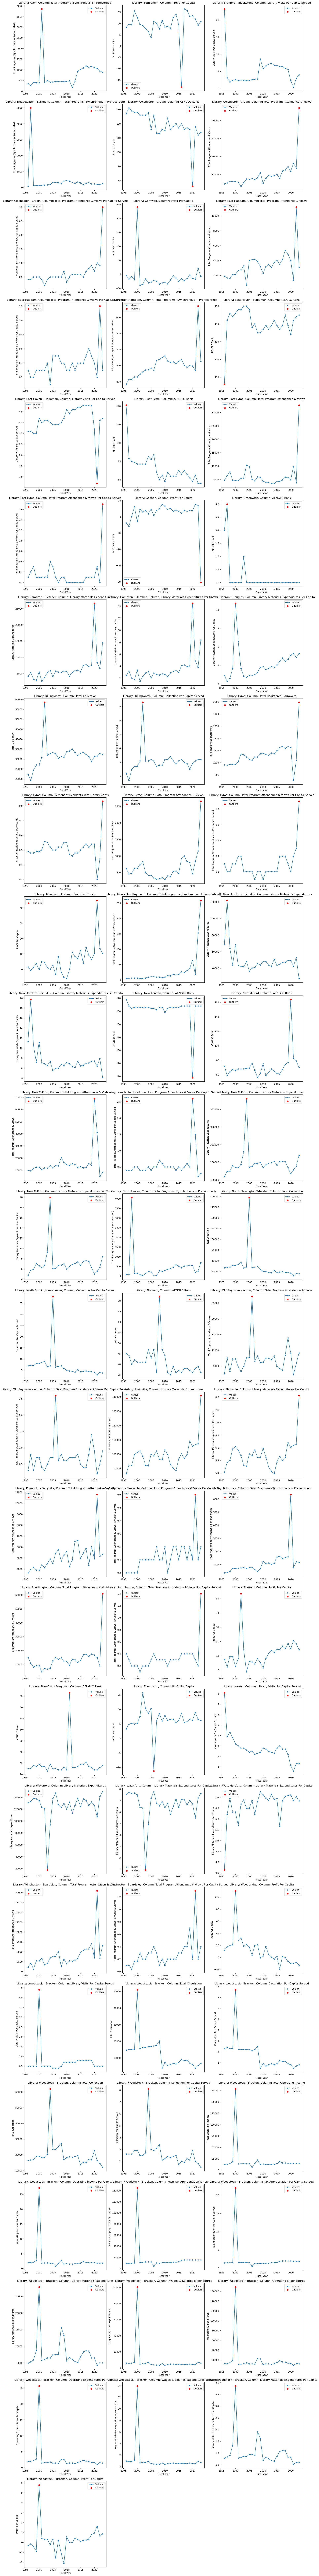

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# קביעת מספר גרפים לשורה
graphs_per_row = 3

# השגת הספריות והעמודות הייחודיות עם ערכים חריגים
unique_library_column_pairs = outliers_df[['Library', 'Column']].drop_duplicates()

# חישוב מספר השורות הנדרשות להצגת כל הגרפים
num_rows = math.ceil(len(unique_library_column_pairs) / graphs_per_row)

# יצירת הגרפים
fig, axes = plt.subplots(num_rows, graphs_per_row, figsize=(18, 6 * num_rows))

# הפיכת axes לרשימה שטוחה למקרה של שורה אחת בלבד
axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes]

# לולאה עבור כל ספרייה ועמודה עם ערכים חריגים
for i, (library, column) in enumerate(unique_library_column_pairs.values):
    # פילטר עבור נתוני הספרייה והעמודה
    library_data = df[df['Library'] == library]
    
    # אינדקסים של הערכים החריגים
    outlier_indices = outliers_df[(outliers_df['Library'] == library) & (outliers_df['Column'] == column)]['Row Index']
    
    # יצירת גרף
    ax = axes[i]
    sns.lineplot(data=library_data, x='Fiscal Year', y=column, marker='o', ax=ax, label='Values')
    
    # סימון הערכים החריגים
    outliers = library_data.loc[outlier_indices]
    ax.scatter(outliers['Fiscal Year'], outliers[column], color='red', label='Outliers', zorder=5)
    
    # כותרת וצירים
    ax.set_title(f"Library: {library}, Column: {column}", fontsize=12)
    ax.set_xlabel("Fiscal Year")
    ax.set_ylabel(column)
    ax.legend()

# הסתרת גרפים ריקים אם יש פחות גרפים מאשר משבצות
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# הצגת הגרפים
plt.tight_layout()
plt.show()


In [119]:
# סינון הספריות עם הערכים החריגים
outlier_counts = (
    outliers_df.groupby('Library')
    .size()
    .reset_index(name='Outlier Count')  # מספר הערכים החריגים לכל ספרייה
)

# הוספת אחוז הערכים החריגים מתוך הסך הכולל
total_outliers = len(outliers_df)  # סך כל הערכים החריגים
outlier_counts['Percentage of Total Outliers'] = (
    (outlier_counts['Outlier Count'] / total_outliers) * 100
)

# מיון לפי כמות הערכים החריגים בסדר יורד
outlier_counts = outlier_counts.sort_values(by='Outlier Count', ascending=False).reset_index(drop=True)

# הדפסת התוצאה
outlier_counts



Library  Outlier Count  Percentage of Total Outliers
0        Woodstock - Bracken             16                     21.052632
1                New Milford              5                      6.578947
2                       Lyme              4                      5.263158
3        Colchester - Cragin              3                      3.947368
4                  East Lyme              3                      3.947368
5       Old Saybrook - Acton              2                      2.631579
6   North Stonington-Wheeler              2                      2.631579
7      Plymouth - Terryville              2                      2.631579
8    New Hartford-Licia M.B.              2                      2.631579
9                Southington              2                      2.631579
10              Killingworth              2                      2.631579
11        Hampton - Fletcher              2                      2.631579
12      East Haven - Hagaman              2                      2.631579
13                 Waterford              2                      2.631579
14               East Haddam              2                      2.631579
15    Winchester - Beardsley              2                      2.631579
16                Plainville              2                      2.631579
17                  Thompson              1                      1.315789
18       Stamford - Ferguson              1                      1.315789
19                    Warren              1                      1.315789
20                  Stafford              1                      1.315789
21                  Simsbury              1                      1.315789
22             West Hartford              1                      1.315789
23                Woodbridge              1                      1.315789
24                      Avon              1                      1.315789
25                   Norwalk              1                      1.315789
26               North Haven              1                      1.315789
27                 Bethlehem              1                      1.315789
28       Montville - Raymond              1                      1.315789
29                 Mansfield              1                      1.315789
30          Hebron - Douglas              1                      1.315789
31                 Greenwich              1                      1.315789
32                    Goshen              1                      1.315789
33              East Hampton              1                      1.315789
34                  Cornwall              1                      1.315789
35     Bridgewater - Burnham              1                      1.315789
36     Branford - Blackstone              1                      1.315789
37                New London              1                      1.315789

In [120]:
df = df[df['Library'] != 'Woodstock - Bracken']

In [121]:
# יצירת DataFrame לאחסון חריגים
outliers_summary = []

# לולאה שעוברת על כל ספריה
for library, group in df.groupby('Library'):
    for col in numeric_columns:
        mean = group[col].mean()  # ממוצע העמודה עבור הספרייה
        std = group[col].std()    # סטיית התקן של העמודה עבור הספרייה
        
        # סינון הערכים החריגים בתוך הספרייה
        outliers = group[(group[col] > (mean + 4 * std)) | (group[col] < (mean - 4 * std))]
        
        # הוספת החריגים לרשימה אם קיימים
        if not outliers.empty:
            for idx, row in outliers.iterrows():
                outliers_summary.append({
                    'Library': library,
                    'Column': col,
                    'Value': row[col],
                    'Row Index': idx
                })

# המרה ל-DataFrame להצגת החריגים בלבד
outliers_df = pd.DataFrame(outliers_summary)

# הצגת החריגים בלבד
if not outliers_df.empty:
    print(outliers_df)
else:
    print("No outliers found.")


                     Library  \
0                       Avon   
1                  Bethlehem   
2      Branford - Blackstone   
3      Bridgewater - Burnham   
4        Colchester - Cragin   
5        Colchester - Cragin   
6        Colchester - Cragin   
7                   Cornwall   
8                East Haddam   
9                East Haddam   
10              East Hampton   
11      East Haven - Hagaman   
12      East Haven - Hagaman   
13                 East Lyme   
14                 East Lyme   
15                 East Lyme   
16                    Goshen   
17                 Greenwich   
18        Hampton - Fletcher   
19        Hampton - Fletcher   
20          Hebron - Douglas   
21              Killingworth   
22              Killingworth   
23                      Lyme   
24                      Lyme   
25                      Lyme   
26                      Lyme   
27                 Mansfield   
28       Montville - Raymond   
29   New Hartford-Licia M.B.   
30   New

In [122]:
# סינון הספריות עם הערכים החריגים
outlier_counts = (
    outliers_df.groupby('Library')
    .size()
    .reset_index(name='Outlier Count')  # מספר הערכים החריגים לכל ספרייה
)

# הוספת אחוז הערכים החריגים מתוך הסך הכולל
total_outliers = len(outliers_df)  # סך כל הערכים החריגים
outlier_counts['Percentage of Total Outliers'] = (
    (outlier_counts['Outlier Count'] / total_outliers) * 100
)

# מיון לפי כמות הערכים החריגים בסדר יורד
outlier_counts = outlier_counts.sort_values(by='Outlier Count', ascending=False).reset_index(drop=True)

# הדפסת התוצאה
outlier_counts



Library  Outlier Count  Percentage of Total Outliers
0                New Milford              5                      8.333333
1                       Lyme              4                      6.666667
2        Colchester - Cragin              3                      5.000000
3                  East Lyme              3                      5.000000
4    New Hartford-Licia M.B.              2                      3.333333
5         Hampton - Fletcher              2                      3.333333
6       Old Saybrook - Acton              2                      3.333333
7                 Plainville              2                      3.333333
8      Plymouth - Terryville              2                      3.333333
9                Southington              2                      3.333333
10              Killingworth              2                      3.333333
11  North Stonington-Wheeler              2                      3.333333
12      East Haven - Hagaman              2                      3.333333
13               East Haddam              2                      3.333333
14                 Waterford              2                      3.333333
15    Winchester - Beardsley              2                      3.333333
16                   Norwalk              1                      1.666667
17                  Stafford              1                      1.666667
18                  Thompson              1                      1.666667
19                    Warren              1                      1.666667
20                  Simsbury              1                      1.666667
21             West Hartford              1                      1.666667
22       Stamford - Ferguson              1                      1.666667
23                      Avon              1                      1.666667
24               North Haven              1                      1.666667
25                New London              1                      1.666667
26                 Bethlehem              1                      1.666667
27       Montville - Raymond              1                      1.666667
28                 Mansfield              1                      1.666667
29          Hebron - Douglas              1                      1.666667
30                 Greenwich              1                      1.666667
31                    Goshen              1                      1.666667
32              East Hampton              1                      1.666667
33                  Cornwall              1                      1.666667
34     Bridgewater - Burnham              1                      1.666667
35     Branford - Blackstone              1                      1.666667
36                Woodbridge              1                      1.666667

### עריכת רעשים חזקים בנתונים בעזרת השלמה של ממוצע שנה קדימה ושנה אחורה

In [123]:
# סינון הערכים החריגים בלבד
outliers_only = df[df.index.isin(outliers_df['Row Index'])]

# רשימת העמודות שבהן יש ערכים חריגים
columns_with_outliers = outliers_df['Column'].unique()

# טיפול בערכים החריגים
for _, row in outliers_df.iterrows():
    library = row['Library']
    column = row['Column']
    row_index = row['Row Index']
    
    # סינון הנתונים עבור הספרייה הספציפית והעמודה
    library_data = df[df['Library'] == library].sort_values(by='Fiscal Year')
    
    # מיקום השנה החריגה
    year = df.loc[row_index, 'Fiscal Year']
    
    # חישוב ממוצע של השנה לפני והשנה שאחרי עבור הספרייה
    previous_year_value = library_data.loc[library_data['Fiscal Year'] == year - 1, column].values
    next_year_value = library_data.loc[library_data['Fiscal Year'] == year + 1, column].values
    
    # השלמת הערך רק אם קיימים נתונים לשנה לפני או אחרי
    if len(previous_year_value) > 0 and len(next_year_value) > 0:
        new_value = (previous_year_value[0] + next_year_value[0]) / 2
    elif len(previous_year_value) > 0:
        new_value = previous_year_value[0]
    elif len(next_year_value) > 0:
        new_value = next_year_value[0]
    else:
        new_value = None  # אם אין נתונים לשנה לפני או אחרי, לא משנים את הערך
    
    # עדכון הערך החדש ב-DataFrame
    if new_value is not None:
        df.loc[row_index, column] = new_value

# הדפסת הודעה לסיום התהליך
print("השלמת הערכים החריגים עבור כל ספרייה בוצעה בהצלחה.")


השלמת הערכים החריגים עבור כל ספרייה בוצעה בהצלחה.


In [124]:
# יצירת DataFrame לאחסון חריגים
outliers_summary = []

# לולאה שעוברת על כל ספריה
for library, group in df.groupby('Library'):
    for col in numeric_columns:
        mean = group[col].mean()  # ממוצע העמודה עבור הספרייה
        std = group[col].std()    # סטיית התקן של העמודה עבור הספרייה
        
        # סינון הערכים החריגים בתוך הספרייה
        outliers = group[(group[col] > (mean + 4 * std)) | (group[col] < (mean - 4 * std))]
        
        # הוספת החריגים לרשימה אם קיימים
        if not outliers.empty:
            for idx, row in outliers.iterrows():
                outliers_summary.append({
                    'Library': library,
                    'Column': col,
                    'Value': row[col],
                    'Row Index': idx
                })

# המרה ל-DataFrame להצגת החריגים בלבד
outliers_df = pd.DataFrame(outliers_summary)

# הצגת החריגים בלבד
if not outliers_df.empty:
    print(outliers_df)
else:
    print("No outliers found.")


       Library                                             Column    Value  \
0    Greenwich                                        AENGLC Rank      3.0   
1  New Milford                   Total Program Attendance & Views  41023.0   
2  New Milford  Total Program Attendance & Views Per Capita Se...      1.5   

   Row Index  
0       1400  
1       2461  
2       2461  


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4424 entries, 0 to 4423
Data columns (total 28 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Fiscal Year                                         4424 non-null   int64  
 1   Library                                             4424 non-null   object 
 2   County                                              4424 non-null   object 
 3   Principal Public?                                   4424 non-null   object 
 4   AENGLC Rank                                         4424 non-null   float64
 5   Population of Service Area                          4424 non-null   float64
 6   Total Library Visits                                4424 non-null   float64
 7   Library Visits Per Capita Served                    4424 non-null   float64
 8   Total Registered Borrowers                          4424 non-null   float64
 9

### בדיקת כמות קומפוננטות עבור המודלים

C:\Users\rotemb\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rotemb\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rotemb\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rotemb\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

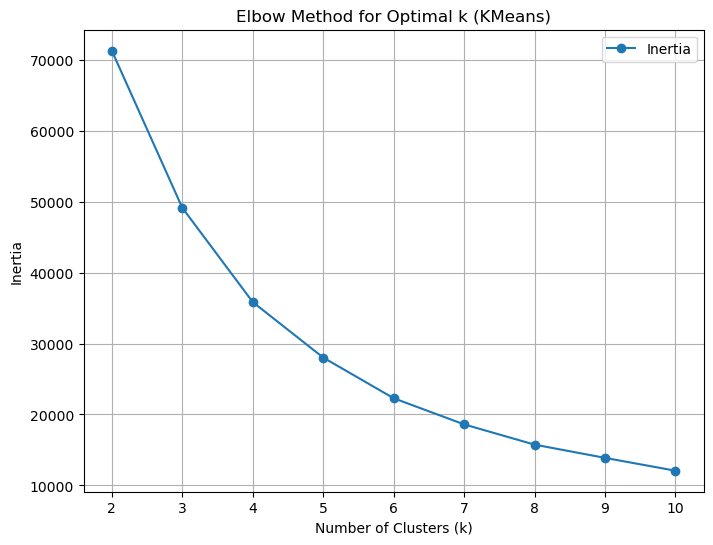

C:\Users\rotemb\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rotemb\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rotemb\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rotemb\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: 

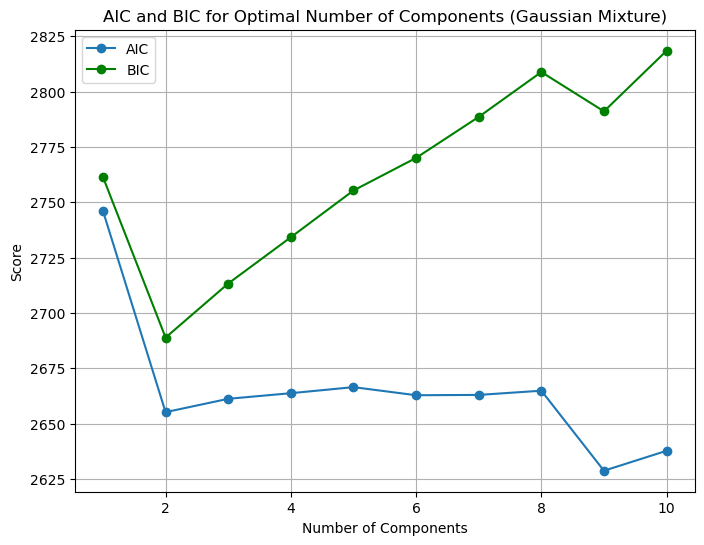

In [129]:
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture

# --- בדיקת כמות הקלאסטרים באמצעות Elbow Method עבור KMeans ---
inertia = []
k_values = range(2, 11)  # טווח מספר הקלאסטרים

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(reduced_data_1)
    inertia.append(kmeans.inertia_)


# גרף המרפק
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', label='Inertia')
plt.title('Elbow Method for Optimal k (KMeans)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.legend()
plt.show()

# --- בדיקת כמות הקומפוננטות עבור Gaussian Mixture  ---
components = range(1, 11)  # טווח כמות הקומפוננטות
aic_scores = []
bic_scores = []

for n in components:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(reduced_data_1)
    aic_scores.append(gmm.aic(reduced_data_1))
    bic_scores.append(gmm.bic(reduced_data_1))

# גרף AIC ו-BIC
plt.figure(figsize=(8, 6))
plt.plot(components, aic_scores, marker='o', label='AIC')
plt.plot(components, bic_scores, marker='o', label='BIC', color='green')
plt.title('AIC and BIC for Optimal Number of Components (Gaussian Mixture)')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.grid(True)
plt.legend()
plt.show()


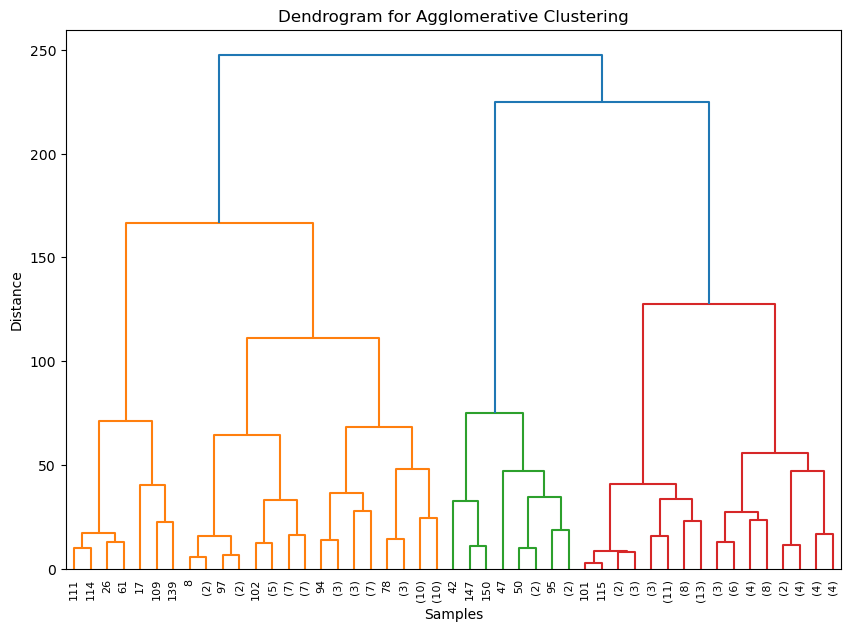

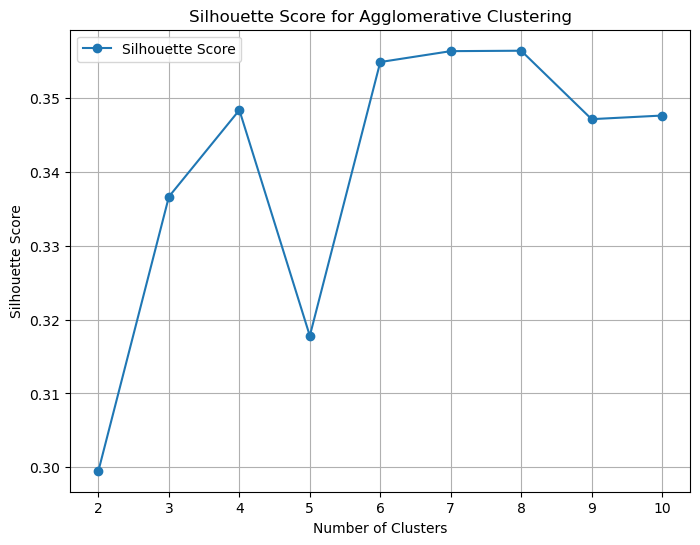

In [134]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import numpy as np

# --- בדיקת כמות הקלאסטרים באמצעות דנדרוגרמה (Agglomerative Clustering) ---
# יצירת דנדרוגרמה
linked = linkage(reduced_data_1, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# --- בדיקת כמות הקלאסטרים באמצעות Silhouette Score ---
silhouette_scores = []
cluster_range = range(2, 11)

for n_clusters in cluster_range:
    model = AgglomerativeClustering(n_clusters=n_clusters)
    labels = model.fit_predict(reduced_data_1)
    score = silhouette_score(reduced_data_1, labels)
    silhouette_scores.append(score)

# גרף Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', label='Silhouette Score')
plt.title('Silhouette Score for Agglomerative Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.legend()
plt.show()


### הרצת המודלים ובדיקת מדדים - PCA לפני הרצת המודלים להפחתת ממדים.

Explained variance ratio (Script 1): [0.45183846 0.32886021]
Number of components retained (Script 1): 2


C:\Users\rotemb\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rotemb\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


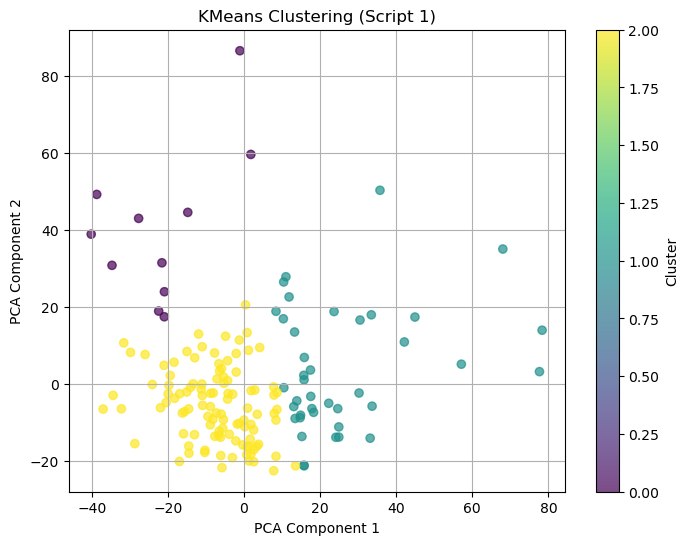

C:\Users\rotemb\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


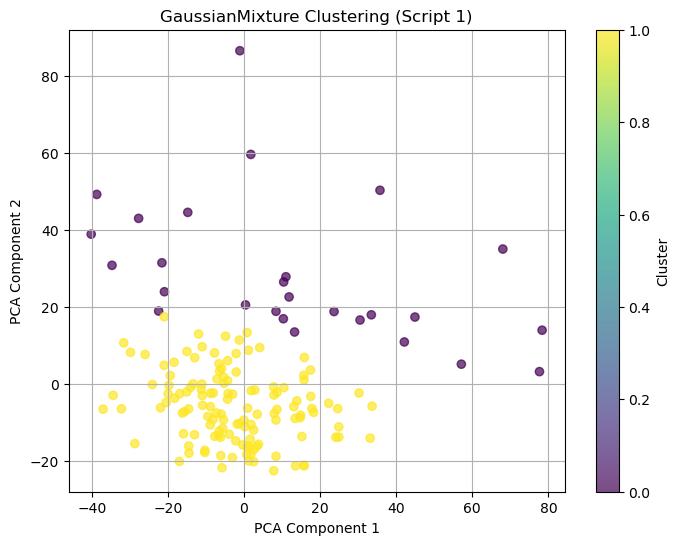

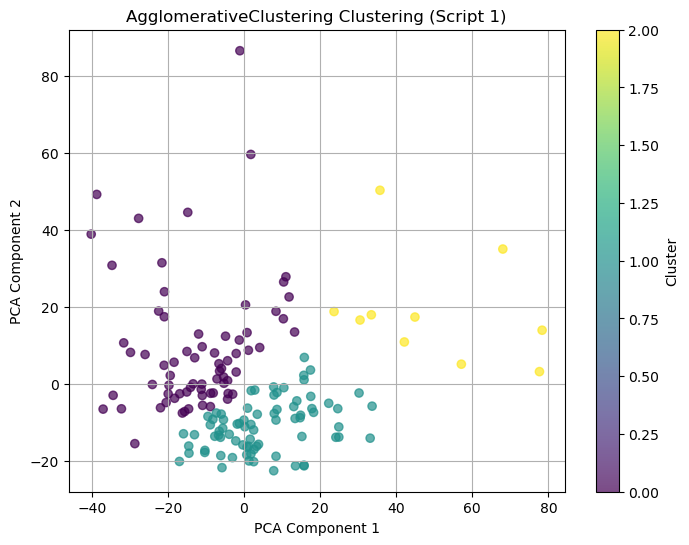


Model Comparison Table (Script 1):
╒═════════════════════════╤════════════════════╕
│                         │   Silhouette Score │
╞═════════════════════════╪════════════════════╡
│ KMeans                  │           0.430529 │
├─────────────────────────┼────────────────────┤
│ GaussianMixture         │           0.495432 │
├─────────────────────────┼────────────────────┤
│ AgglomerativeClustering │           0.336652 │
╘═════════════════════════╧════════════════════╛


In [137]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
from tabulate import tabulate

# שלב 1: יצירת סטטיסטיקות נוספות עבור כל ספריה
features_1 = [
    'Library Visits Per Capita Served',
    'Percent of Residents with Library Cards',
    'Circulation Per Capita Served',
    'Total Program Attendance & Views Per Capita Served',
    'Collection Per Capita Served',
    'Profit Per Capita',
    'Population of Service Area',
    'AENGLC Rank'
]

# יצירת עותק של הנתונים המקוריים
original_data_1 = df.copy()

# חישוב סטטיסטיקות
aggregated_data_1 = original_data_1.groupby('Library')[features_1].agg(['mean', 'min', 'max', 'std', 'median']).reset_index()
aggregated_data_1.columns = ['_'.join(col).strip('_') if col[1] else col[0] for col in aggregated_data_1.columns]
library_column_1 = aggregated_data_1['Library']

# שלב 2: יצירת עותק לנרמול
data_for_models_1 = aggregated_data_1.drop(columns=['Library']).copy()

# נרמול כל העמודות של Population of Service Area ו-AENGLC Rank
columns_to_normalize_1 = [col for col in data_for_models_1.columns if 'Population of Service Area' in col or 'AENGLC Rank' in col]
scaler_1 = StandardScaler()
data_for_models_1[columns_to_normalize_1] = scaler_1.fit_transform(data_for_models_1[columns_to_normalize_1])

# שלב 3: הפחתת ממדים עם PCA 
pca_1 = PCA(n_components=2)
reduced_data_1 = pd.DataFrame(pca_1.fit_transform(data_for_models_1))
print(f"Explained variance ratio (Script 1): {pca_1.explained_variance_ratio_}")
print(f"Number of components retained (Script 1): {pca_1.n_components_}")

# שלב 4: הגדרת המודלים
models_1 = {
    'KMeans': KMeans(n_clusters=3, random_state=42),
    'GaussianMixture': GaussianMixture(n_components=2, random_state=42),
    'AgglomerativeClustering': AgglomerativeClustering(n_clusters=3)
}

# יצירת עותק של הדאטה המקורית
clustered_data = original_data_1.copy()

# שלב 5: הרצת המודלים והוספת עמודות קלאסטרים לדאטה המקורית
results_1 = {}

for name, model in models_1.items():
    labels_1 = model.fit_predict(reduced_data_1)
    
    # הוספת עמודת קלאסטרים לכל ספריה
    aggregated_data_1[f'{name}_Cluster'] = labels_1  # הוספת קלאסטרים לנתוני האגרגציה
    
    # מיפוי הקלאסטרים לנתונים המקוריים לפי ספריה
    cluster_mapping = aggregated_data_1.set_index('Library')[f'{name}_Cluster'].to_dict()
    clustered_data[f'{name}_Cluster'] = clustered_data['Library'].map(cluster_mapping)
    
    # חישוב מדדי איכות
    silhouette_1 = silhouette_score(reduced_data_1, labels_1) if len(set(labels_1)) > 1 else -1
    
    results_1[name] = {
        'Silhouette Score': silhouette_1
    }
    
    # ויזואליזציה
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_data_1.iloc[:, 0], reduced_data_1.iloc[:, 1], c=labels_1, cmap='viridis', alpha=0.7)
    plt.title(f'{name} Clustering (Script 1)')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster')
    plt.grid()
    plt.show()

# טבלה מסכמת
results_df_1 = pd.DataFrame(results_1).T
print("\nModel Comparison Table (Script 1):")
print(tabulate(results_df_1, headers='keys', tablefmt='fancy_grid', showindex=True))




### הרצת המודלים ללא PCA ולאחר מכן הוספת PCA לצורך וזיאוליזציה

C:\Users\rotemb\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rotemb\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


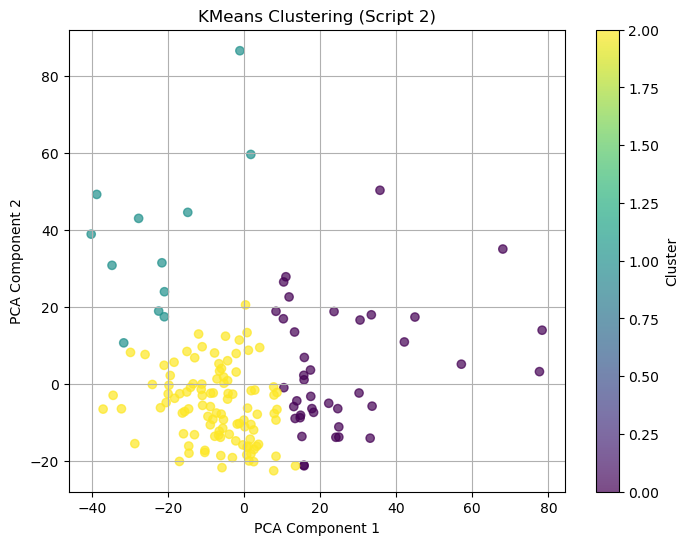

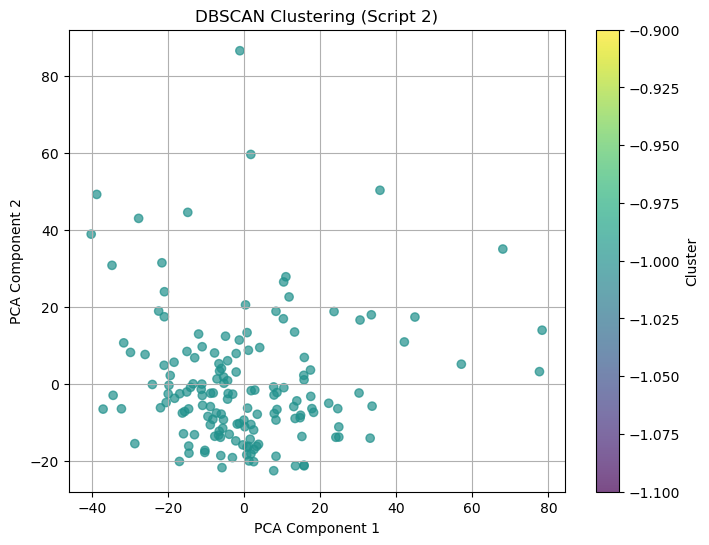

C:\Users\rotemb\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


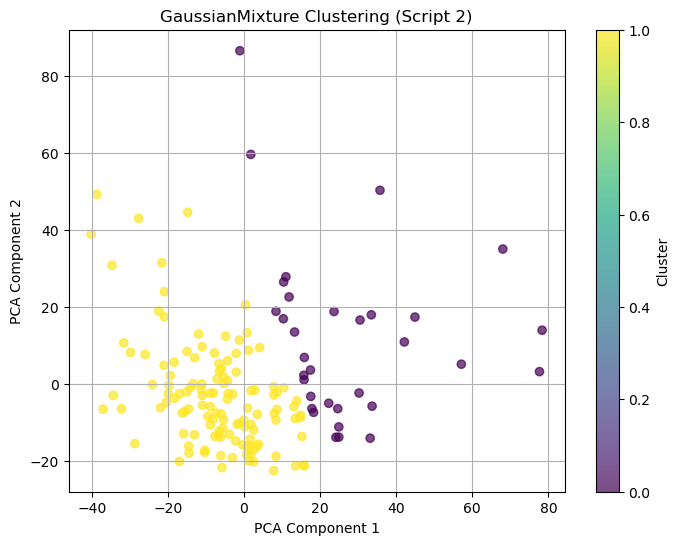

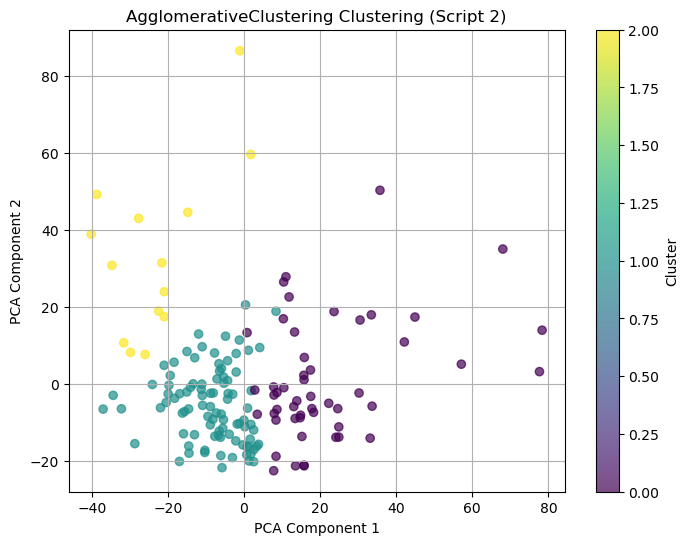

C:\Users\rotemb\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rotemb\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


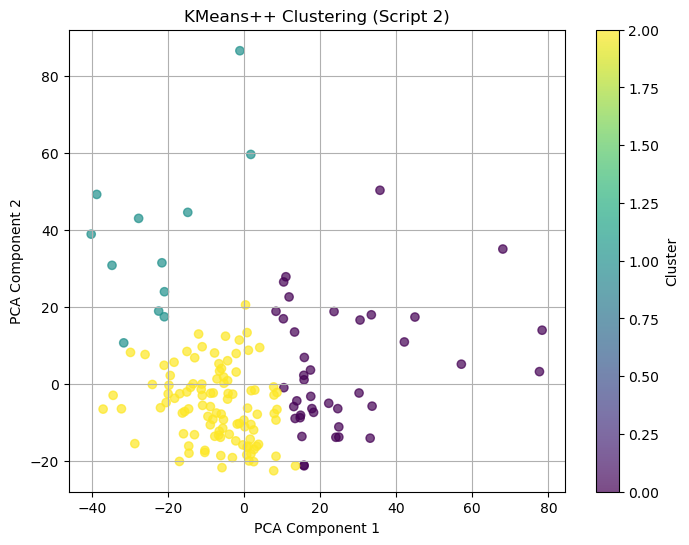

<Figure size 1400x600 with 0 Axes>

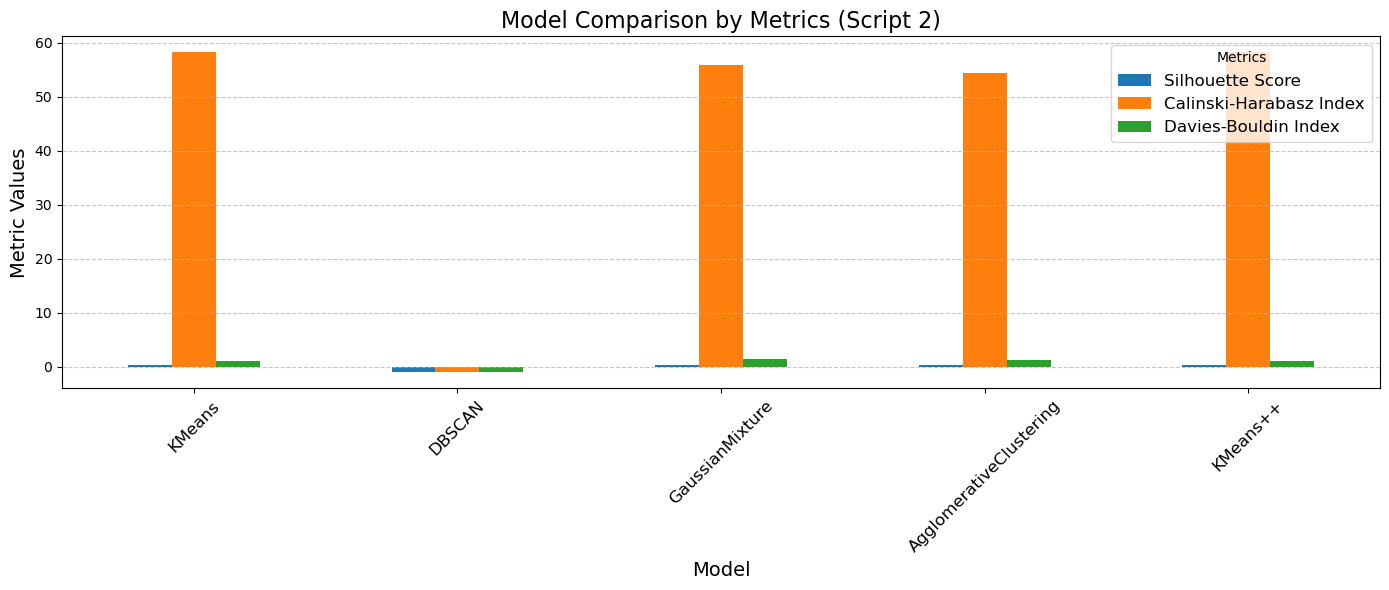


Model Comparison Table (Script 2):
╒═════════════════════════╤════════════════════╤═══════════════════════════╤════════════════════════╕
│                         │   Silhouette Score │   Calinski-Harabasz Index │   Davies-Bouldin Index │
╞═════════════════════════╪════════════════════╪═══════════════════════════╪════════════════════════╡
│ KMeans                  │           0.340768 │                   58.221  │                1.169   │
├─────────────────────────┼────────────────────┼───────────────────────────┼────────────────────────┤
│ DBSCAN                  │          -1        │                   -1      │               -1       │
├─────────────────────────┼────────────────────┼───────────────────────────┼────────────────────────┤
│ GaussianMixture         │           0.373663 │                   55.8905 │                1.38793 │
├─────────────────────────┼────────────────────┼───────────────────────────┼────────────────────────┤
│ AgglomerativeClustering │           0.289287

In [130]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# שלב 1: יצירת סטטיסטיקות נוספות עבור כל ספריה
features_2 = [
    'Library Visits Per Capita Served',
    'Percent of Residents with Library Cards',
    'Circulation Per Capita Served',
    'Total Program Attendance & Views Per Capita Served',
    'Collection Per Capita Served',
    'Profit Per Capita',
    'Population of Service Area',
    'AENGLC Rank'
]

# יצירת עותק של הנתונים המקוריים
original_data_2 = df.copy()

# חישוב סטטיסטיקות
aggregated_data_2 = original_data_2.groupby('Library')[features_2].agg(['mean', 'min', 'max', 'std', 'median']).reset_index()
aggregated_data_2.columns = ['_'.join(col).strip('_') if col[1] else col[0] for col in aggregated_data_2.columns]
library_column_2 = aggregated_data_2['Library']

# שלב 2: יצירת עותק לנרמול
data_for_models_2 = aggregated_data_2.drop(columns=['Library']).copy()

# נרמול כל העמודות של Population of Service Area ו-AENGLC Rank
columns_to_normalize_2 = [col for col in data_for_models_2.columns if 'Population of Service Area' in col or 'AENGLC Rank' in col]
scaler_2 = StandardScaler()
data_for_models_2[columns_to_normalize_2] = scaler_2.fit_transform(data_for_models_2[columns_to_normalize_2])

# שלב 3: הגדרת המודלים
models_2 = {
    'KMeans': KMeans(n_clusters=3, random_state=42),
    'DBSCAN': DBSCAN(eps=0.01, min_samples=2),
    'GaussianMixture': GaussianMixture(n_components=2, random_state=42),
    'AgglomerativeClustering': AgglomerativeClustering(n_clusters=3),
    'KMeans++': KMeans(n_clusters=3, init='k-means++', random_state=42)
}

# שלב 4: הרצת המודלים והשוואת תוצאות
results_2 = {}

for name, model in models_2.items():
    labels_2 = model.fit_predict(data_for_models_2)
    
    # חישוב מדדי איכות
    silhouette_2 = silhouette_score(data_for_models_2, labels_2) if len(set(labels_2)) > 1 else -1
    calinski_2 = calinski_harabasz_score(data_for_models_2, labels_2) if len(set(labels_2)) > 1 else -1
    davies_2 = davies_bouldin_score(data_for_models_2, labels_2) if len(set(labels_2)) > 1 else -1
    
    results_2[name] = {
        'Silhouette Score': silhouette_2,
        'Calinski-Harabasz Index': calinski_2,
        'Davies-Bouldin Index': davies_2
    }
    
    # ויזואליזציה עם PCA
    pca_2 = PCA(n_components=2)
    data_pca_2 = pd.DataFrame(pca_2.fit_transform(data_for_models_2), columns=['PCA1_2', 'PCA2_2'])
    plt.figure(figsize=(8, 6))
    plt.scatter(data_pca_2['PCA1_2'], data_pca_2['PCA2_2'], c=labels_2, cmap='viridis', alpha=0.7)
    plt.title(f'{name} Clustering (Script 2)')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster')
    plt.grid()
    plt.show()

# שלב 5: הצגת תוצאות כגרף עמודות
results_df_2 = pd.DataFrame(results_2).T

# עיצוב גרף העמודות
plt.figure(figsize=(14, 6))
results_df_2.plot(kind='bar', figsize=(14, 6), legend=True)
plt.title('Model Comparison by Metrics (Script 2)', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Metric Values', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Metrics', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# שלב 6: טבלה מעוצבת
print("\nModel Comparison Table (Script 2):")
print(tabulate(results_df_2, headers='keys', tablefmt='fancy_grid', showindex=True))


### קיבלנו שהמודל הטוב ביותר הוא GaussianMixture ולכן נבדוק מה המאפיינים שלו

In [136]:
# רשימת העמודות הרצויות
columns_to_display = [
    'AENGLC Rank', 'Population of Service Area', 'Library Visits Per Capita Served',
    'Percent of Residents with Library Cards', 'Circulation Per Capita Served',
    'Total Program Attendance & Views Per Capita Served', 'Collection Per Capita Served',
    'Operating Income Per Capita', 'Tax Appropriation Per Capita Served',
    'Operating Expenditures Per Capita', 'Wages & Salaries Expenditures Per Capita',
    'Library Materials Expenditures Per Capita', 'Profit Per Capita'
]

# קיבוץ לפי GaussianMixture_Cluster וחישוב ממוצעים עבור העמודות הרצויות
cluster_summary = (
    clustered_data.groupby('GaussianMixture_Cluster')[columns_to_display]
    .mean()
    .reset_index()
)

# הפיכת הטבלה לאורך
cluster_summary_long = cluster_summary.set_index('GaussianMixture_Cluster').T.reset_index()
cluster_summary_long.rename(columns={'index': 'Metric'}, inplace=True)

# הצגת הטבלה
import pandas as pd
from tabulate import tabulate

cluster_summary_long


GaussianMixture_Cluster                                             Metric  \
0                                                              AENGLC Rank   
1                                               Population of Service Area   
2                                         Library Visits Per Capita Served   
3                                  Percent of Residents with Library Cards   
4                                            Circulation Per Capita Served   
5                        Total Program Attendance & Views Per Capita Se...   
6                                             Collection Per Capita Served   
7                                              Operating Income Per Capita   
8                                      Tax Appropriation Per Capita Served   
9                                        Operating Expenditures Per Capita   
10                                Wages & Salaries Expenditures Per Capita   
11                               Library Materials Expenditures Per Capita   
12                                                       Profit Per Capita   

GaussianMixture_Cluster             0             1  
0                           36.461640     94.937419  
1                        20681.462963  21691.721101  
2                            9.018675      5.062477  
3                            0.579348      0.497394  
4                           12.621043      7.541689  
5                            1.077724      0.434007  
6                            8.854630      4.996970  
7                           89.591032     37.874700  
8                           56.895040     33.051667  
9                           84.451455     37.572059  
10                          47.195150     22.692152  
11                           8.503851      4.403882  
12                           5.864093      6.268699

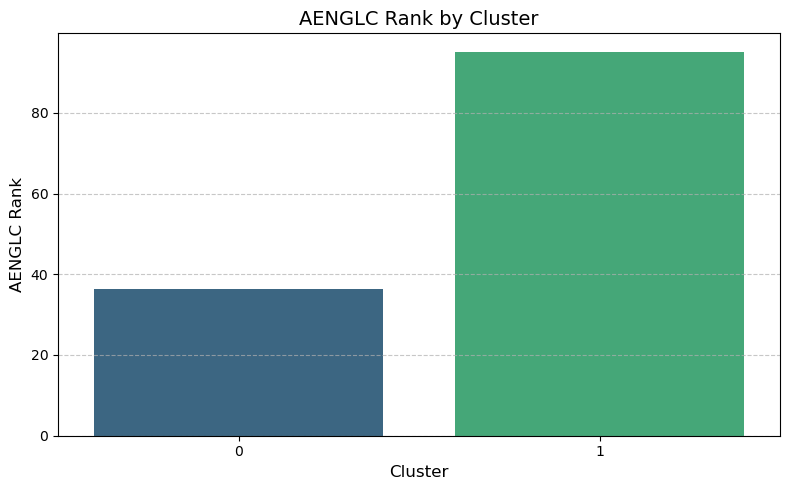

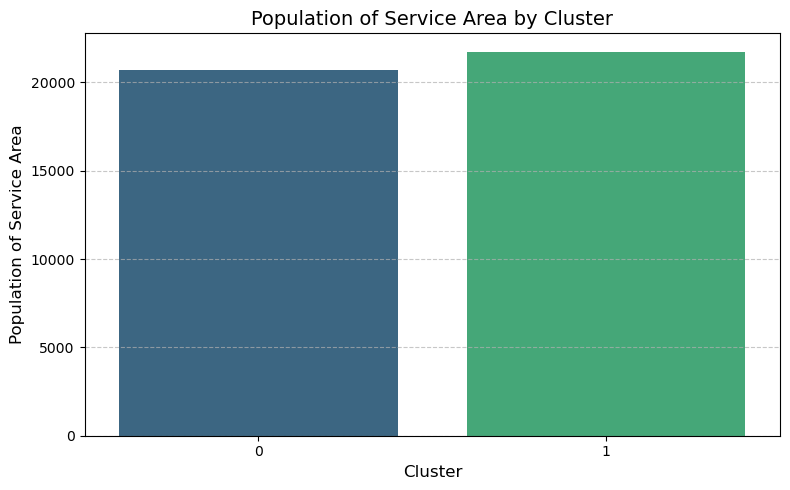

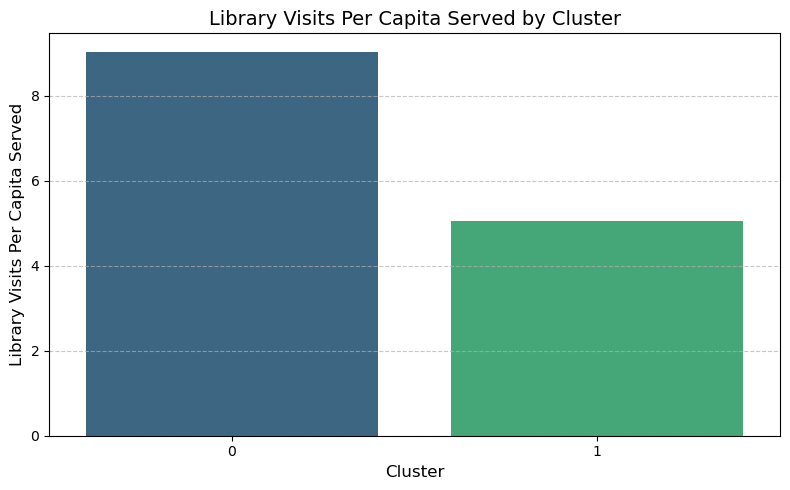

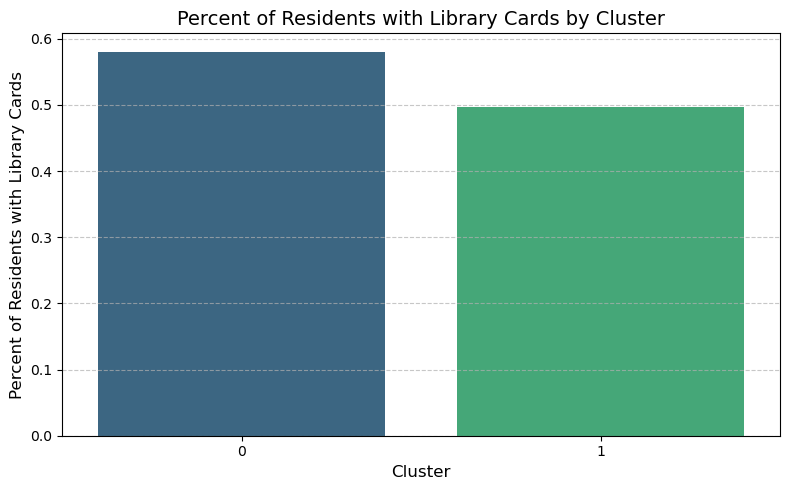

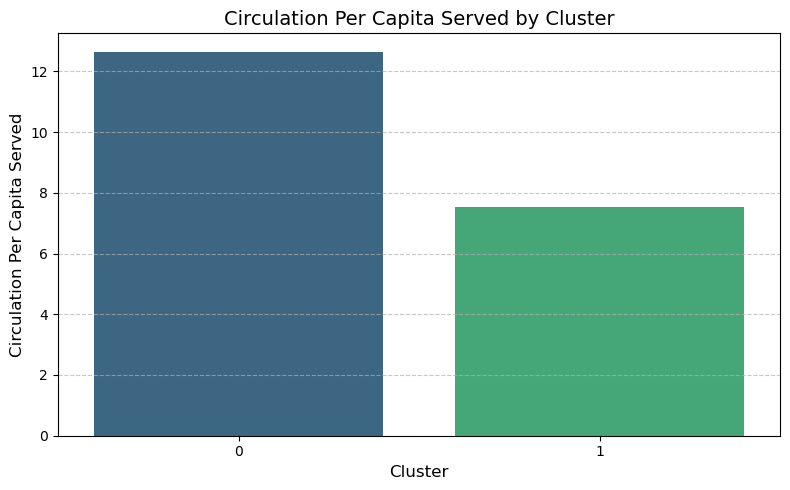

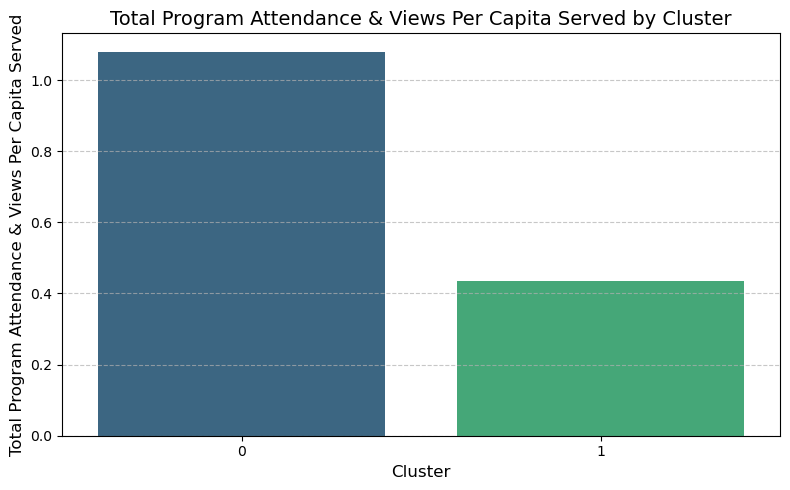

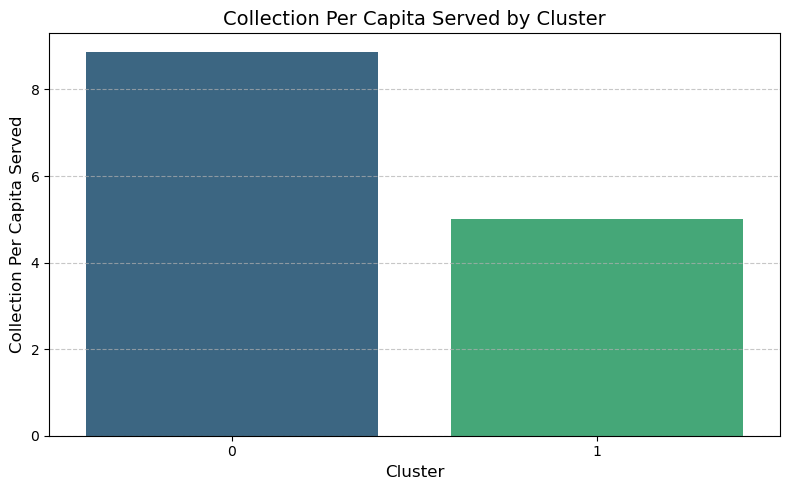

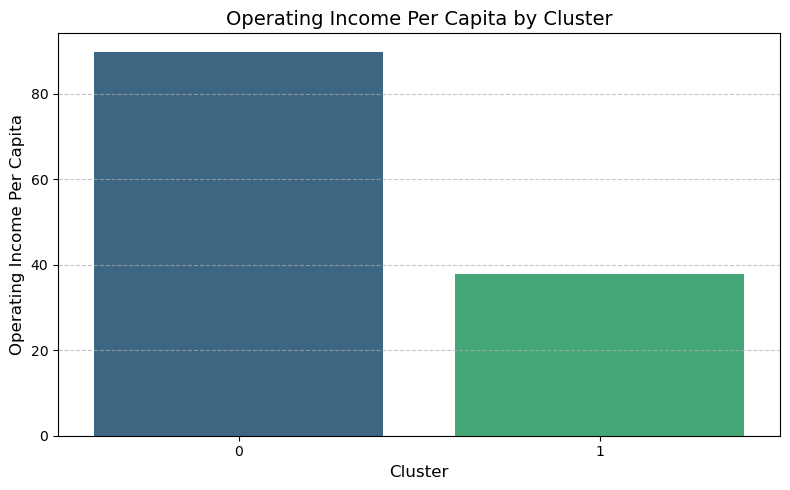

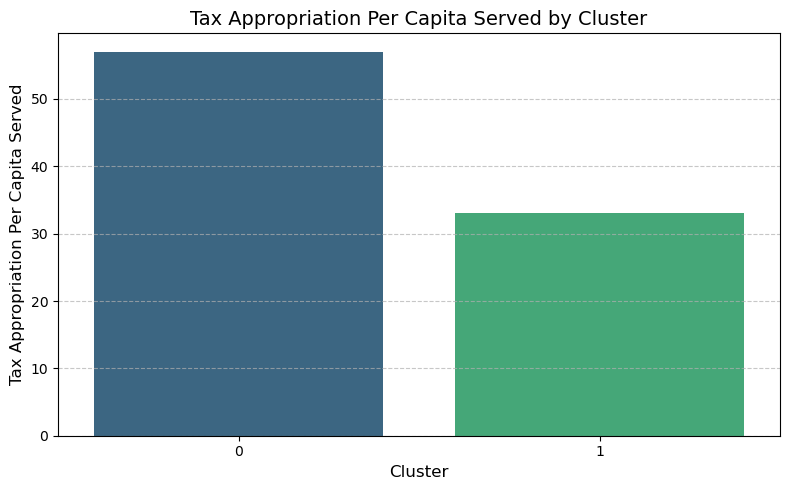

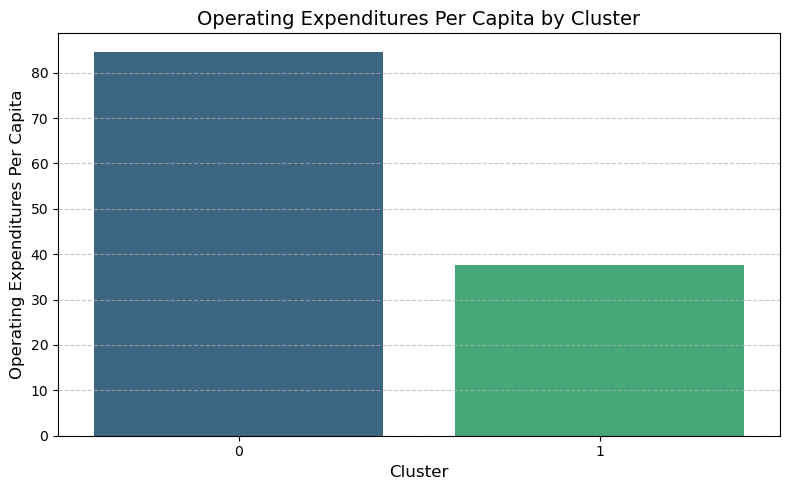

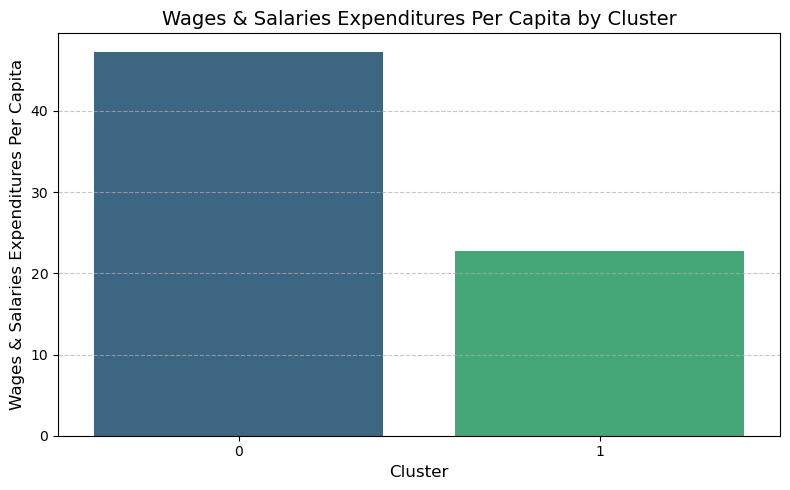

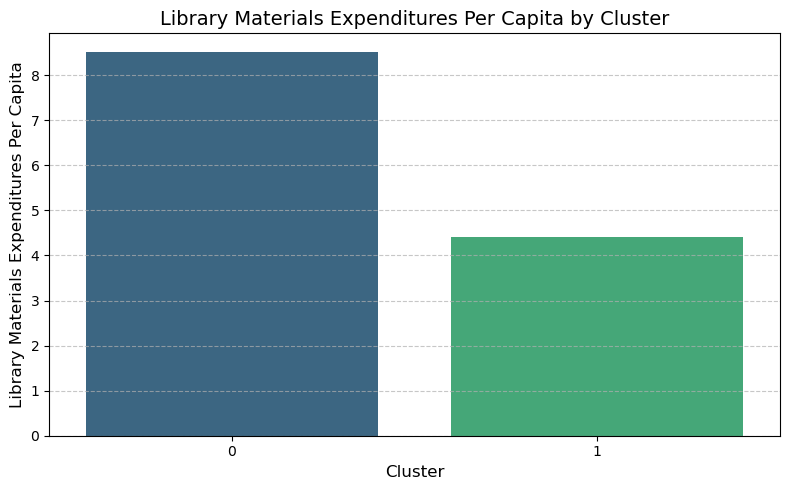

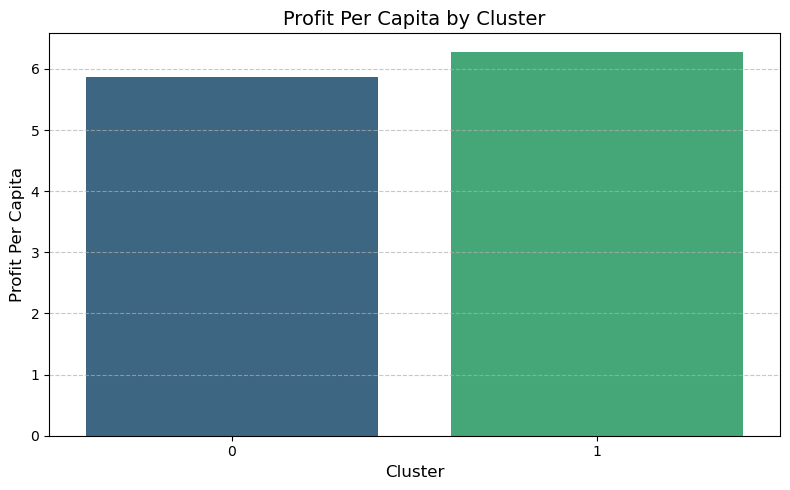

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# הגדרת העמודות להצגה
columns_to_plot = cluster_summary.columns[1:]  # כל העמודות למעט 'GaussianMixture_Cluster'

# יצירת גרפים
for column in columns_to_plot:
    plt.figure(figsize=(8, 5))
    sns.barplot(data=cluster_summary, x='GaussianMixture_Cluster', y=column, palette='viridis')
    plt.title(f'{column} by Cluster', fontsize=14)
    plt.ylabel(column, fontsize=12)
    plt.xlabel('Cluster', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [60]:
# חישוב כמות השורות בכל קלאסטר
cluster_counts = clustered_data['GaussianMixture_Cluster'].value_counts()

# חישוב אחוזים
total_rows = clustered_data.shape[0]
cluster_percentages = (cluster_counts / total_rows) * 100

# הצגת התוצאות
for cluster, count in cluster_counts.items():
    percentage = cluster_percentages[cluster]
    print(f"Cluster {cluster}: {count} rows ({percentage:.2f}%) of the total {total_rows} rows.")


Cluster 1: 3668 rows (82.91%) of the total 4424 rows.
Cluster 0: 756 rows (17.09%) of the total 4424 rows.


In [61]:
# חישוב כמות הספריות בכל קלאסטר
libraries_per_cluster = clustered_data.groupby('GaussianMixture_Cluster')['Library'].nunique()

# חישוב סך הספריות
total_libraries = clustered_data['Library'].nunique()

# חישוב אחוזים
library_percentages = (libraries_per_cluster / total_libraries) * 100

# הצגת התוצאות
for cluster, count in libraries_per_cluster.items():
    percentage = library_percentages[cluster]
    print(f"Cluster {cluster}: {count} libraries ({percentage:.2f}%) of the total {total_libraries} libraries.")


Cluster 0: 27 libraries (17.09%) of the total 158 libraries.
Cluster 1: 131 libraries (82.91%) of the total 158 libraries.


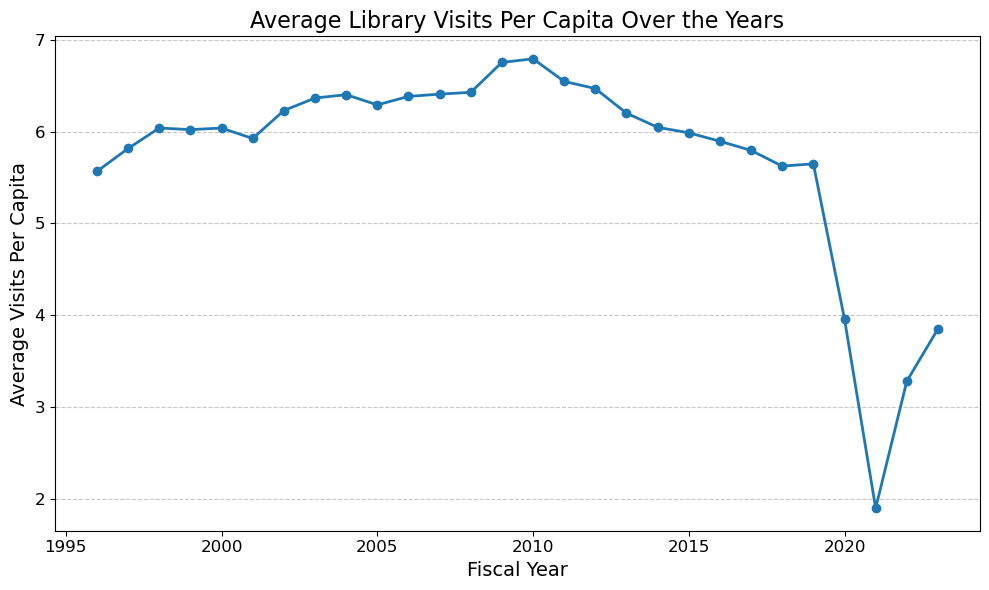

In [62]:
import matplotlib.pyplot as plt

# חישוב ממוצע הביקורים לנפש לכל שנה
visits_per_year = df.groupby('Fiscal Year')['Library Visits Per Capita Served'].mean()

# יצירת גרף קו
plt.figure(figsize=(10, 6))
plt.plot(visits_per_year.index, visits_per_year.values, marker='o', linestyle='-', linewidth=2)
plt.title('Average Library Visits Per Capita Over the Years', fontsize=16)
plt.xlabel('Fiscal Year', fontsize=14)
plt.ylabel('Average Visits Per Capita', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
